In [1]:
import glob
import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt

from histogram_functions import *

from invisible_cities.io.pmaps_io import load_pmaps_as_df

to_df = pd.DataFrame.from_records

In [2]:
datadir = "/Users/gonzalo/Documents/NEXT/DATA/summary/"
run    = 6971
trigger = "trigger1"

icversion_file  = tb.open_file( datadir + f"/pmaps_summary_{run}_{trigger}_icversion.h5"   , "r")
testprod_file   = tb.open_file( datadir + f"/pmaps_summary_{run}_{trigger}_ictestprod.h5"  , "r")
testprod_p_file = tb.open_file( datadir + f"/pmaps_summary_{run}_{trigger}_ictestprod_p.h5", "r")

## DATA

In [3]:
## number of events
nev_icversion  = icversion_file .root.N_events.Nevents.read()
nev_testprod   = testprod_file  .root.N_events.Nevents.read()
nev_testprod_p = testprod_p_file.root.N_events.Nevents.read()

## S1 data
S1_icversion  = to_df ( icversion_file .root.S1.S1.read() ) 
S1_testprod   = to_df ( testprod_file  .root.S1.S1.read() )
S1_testprod_p = to_df ( testprod_p_file.root.S1.S1.read() )

## S2 data
S2_icversion  = to_df ( icversion_file .root.S2.S2.read() )
S2_testprod   = to_df ( testprod_file  .root.S2.S2.read() )
S2_testprod_p = to_df ( testprod_p_file.root.S2.S2.read() )

## TP Slide data
Sld_icversion  = to_df ( icversion_file .root.Slide.Sld.read() )
Sld_testprod   = to_df ( testprod_file  .root.Slide.Sld.read() )
Sld_testprod_p = to_df ( testprod_p_file.root.Slide.Sld.read() )

## event number-file number
event_file = np.unique( icversion_file.root.S2.S2.read()[["event", "file"]] )

## Number of events

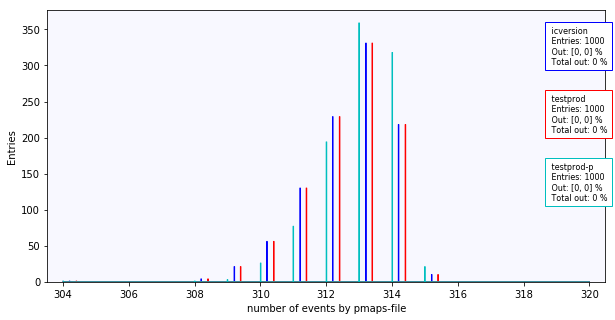

In [4]:
key = "n_events"
histo1D(nev_icversion [key] + 0.2,
        nev_testprod  [key] + 0.4,
        nev_testprod_p[key],
        xlabel = "number of events by pmaps-file",
        Label0 = "icversion",
        Label1 = "testprod",
        Label2 = "testprod-p",
        bins= 1000,
        xlims=[None, 320],
        scale = "linear")

## S1

In [5]:
S1_events_icversion = np.unique(S1_icversion["event"] )
S2_events_icversion = np.unique(S2_icversion["event"] )
events_without_S1_icversion = np.setdiff1d(S2_events_icversion, S1_events_icversion)

S1_events_testprod = np.unique(S1_testprod["event"] )
S2_events_testprod = np.unique(S2_testprod["event"] )
events_without_S1_testprod  = np.setdiff1d(S2_events_testprod, S1_events_testprod)

S1_events_testprod_p = np.unique(S1_testprod_p["event"] )
S2_events_testprod_p = np.unique(S2_testprod_p["event"] )
events_without_S1_testprod_p = np.setdiff1d(S2_events_testprod_p, S1_events_testprod_p)

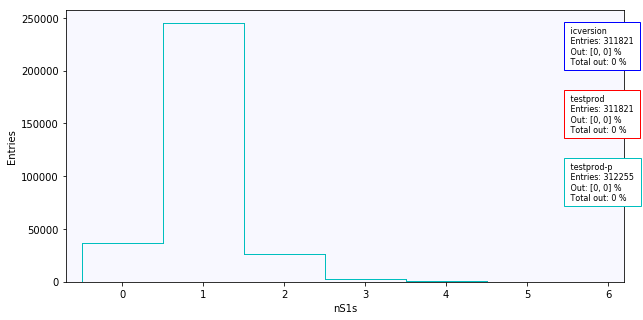

In [6]:
_, nS1s_icversion  = np.unique(S1_icversion ["event"], return_counts=True)
nS1s_icversion = np.concatenate((nS1s_icversion, np.zeros(len(events_without_S1_icversion))))
_, nS1s_testprod   = np.unique(S1_testprod  ["event"], return_counts=True)
nS1s_testprod = np.concatenate((nS1s_testprod, np.zeros(len(events_without_S1_testprod))))
_, nS1s_testprod_p = np.unique(S1_testprod_p["event"], return_counts=True)
nS1s_testprod_p = np.concatenate((nS1s_testprod_p, np.zeros(len(events_without_S1_testprod_p))))

key = "nS1s"
histo1D(nS1s_icversion,
        nS1s_testprod,
        nS1s_testprod_p,
        xlabel = key,
        Label0 = "icversion",
        Label1 = "testprod",
        Label2 = "testprod-p",
        bins=np.arange(-0.5, 6),
        xlims=[-0.5, 6],
        scale = "linear")

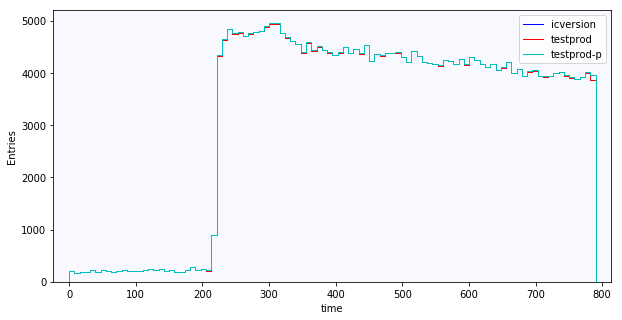

In [7]:
key = "time"
histo1D(S1_icversion [key].values,
        S1_testprod  [key].values,
        S1_testprod_p[key].values,
        xlabel = key,
        Label0 = "icversion",
        Label1 = "testprod",
        Label2 = "testprod-p",
        bins=100,
        Bbox=False)

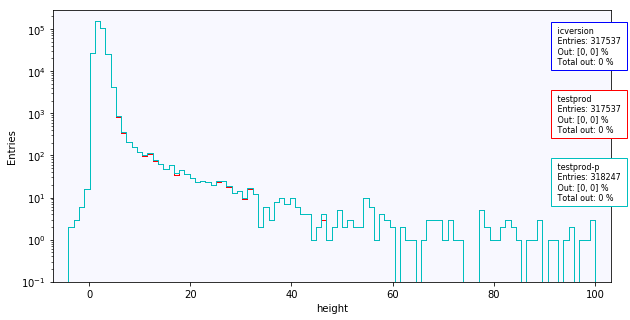

In [8]:
key = "height"
histo1D(S1_icversion [key].values,
        S1_testprod  [key].values,
        S1_testprod_p[key].values,
        xlabel = key,
        Label0 = "icversion",
        Label1 = "testprod",
        Label2 = "testprod-p",
        bins=100, 
        xlims=[None, 100],
        scale = "log")

In [9]:
neg_height = S1_icversion[S1_icversion["height"]<0]["event"].values

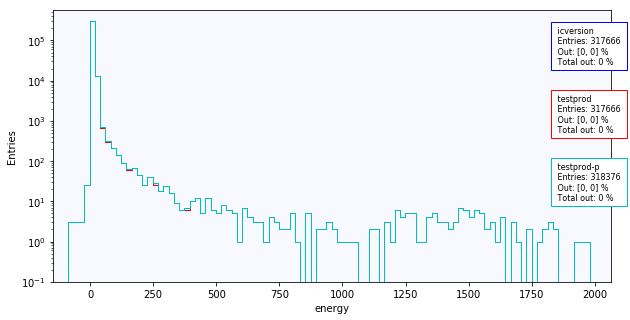

In [10]:
key = "energy"
histo1D(S1_icversion [key].values,
        S1_testprod  [key].values,
        S1_testprod_p[key].values,
        xlabel = key,
        Label0 = "icversion",
        Label1 = "testprod",
        Label2 = "testprod-p",
        bins=100, 
        xlims=[None, 2e3],
        scale = "log")

In [11]:
neg_energy = S1_icversion[S1_icversion["energy"]<0]["event"].values

print( np.isin(neg_height, neg_energy).all() )
len(neg_energy) / len( S1_icversion["event"].values )*100

True


0.022660250458712707

In [12]:
np.unique( neg_energy, return_counts=True)

(array([ 29947,  44452,  70004,  75170, 101778, 118225, 123464, 125295,
        135714, 137598, 159449, 175249, 180965, 193332, 229303, 244593,
        251016, 263213, 266713, 283514, 286075]),
 array([ 1, 19,  1,  4,  2, 11,  1,  3,  1,  1,  1,  1,  1,  1,  3, 15,  2,
         1,  1,  1,  1]))

In [13]:
sel = np.isin( event_file["event"], neg_energy)

event_file_selection = event_file[sel]

to_df(event_file_selection)

,event,file
0,29947,95
1,44452,141
2,70004,222
3,75170,239
4,101778,324
5,118225,376
6,123464,393
7,125295,399
8,135714,432
9,137598,438


In [14]:
nS1s=[]
for event in event_file_selection["event"]:
    nS1s.append(len(S1_icversion[S1_icversion["event"]==event]))

In [15]:
nS1s

[256, 132, 19, 139, 5, 13, 2, 6, 5, 7, 8, 2, 3, 4, 39, 61, 4, 3, 4, 2, 8]

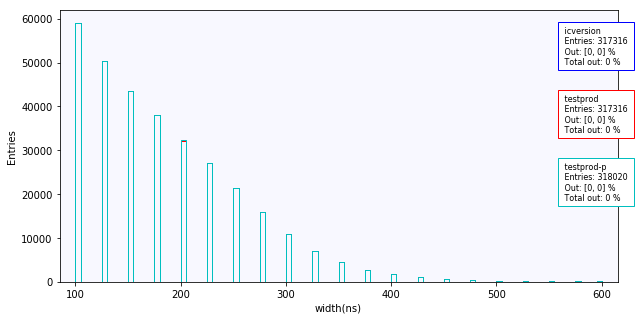

In [16]:
key = "width"
histo1D(S1_icversion [key].values,
        S1_testprod  [key].values,
        S1_testprod_p[key].values,
        xlabel = key + "(ns)",
        Label0 = "icversion",
        Label1 = "testprod",
        Label2 = "testprod-p",
        bins=100, 
        xlims=[None, 6e2],
        scale = "linear")

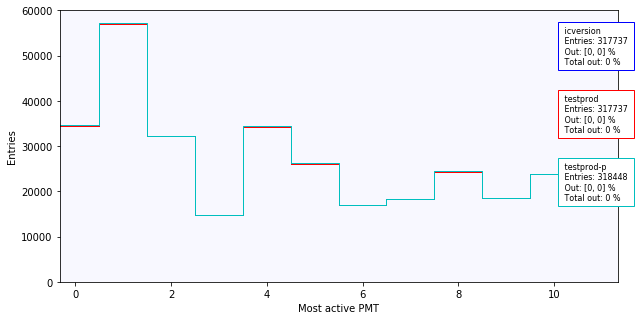

In [17]:
key = "most_active_PMT"
histo1D(S1_icversion [key].values,
        S1_testprod  [key].values,
        S1_testprod_p[key].values,
        xlabel = "Most active PMT",
        Label0 = "icversion",
        Label1 = "testprod",
        Label2 = "testprod-p",
        bins=np.arange(-0.5, 12.5), 
        xlims=[None, None],
        scale = "linear")

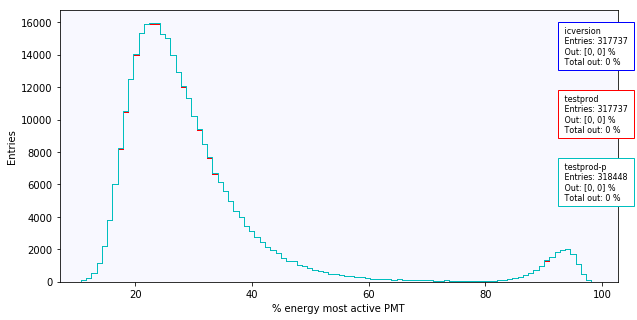

In [18]:
key = "energy_fraction_most_active_PMT"
histo1D(S1_icversion [key].values,
        S1_testprod  [key].values,
        S1_testprod_p[key].values,
        xlabel = "% energy most active PMT",
        Label0 = "icversion",
        Label1 = "testprod",
        Label2 = "testprod-p",
        bins=100, 
        xlims=[None, None],
        scale = "linear")

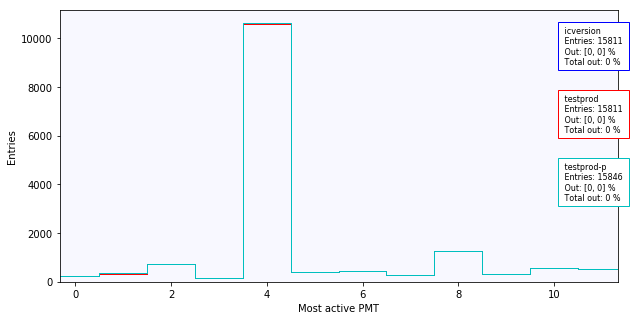

In [19]:
histo1D( S1_icversion  [S1_icversion[key]>80] ["most_active_PMT"],
         S1_testprod   [S1_testprod[key]>80]  ["most_active_PMT"],
         S1_testprod_p [S1_testprod_p[key]>80]["most_active_PMT"],
         bins=np.arange(-0.5, 12.5),
         xlabel = "Most active PMT",
         Label0 = "icversion",
         Label1 = "testprod",
         Label2 = "testprod-p",
         xlims=[None, None],
         scale = "linear")

In [23]:
len(evts)/ len(np.unique( S1_icversion))

0.011289108957006145

In [21]:
evts = np.unique( S1_icversion  [S1_icversion["energy_fraction_most_active_PMT"]>80]["event"].values)

S1_selection = S1_icversion[ np.isin( S1_icversion["event"], evts) ]
without_S1_selection = events_without_S1_icversion[np.isin(events_without_S1_icversion, evts)]

_, nS1s = np.unique(S1_selection ["event"], return_counts=True)
nS1s = np.concatenate((nS1s, np.zeros(len(without_S1_selection))))

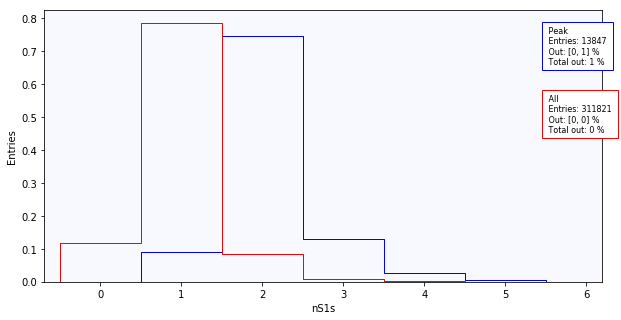

In [22]:
histo1D(nS1s,
        nS1s_icversion,
        bins=np.arange(-0.5, 6),
        xlims=[-0.5, 6],
        Label0="Peak",
        Label1="All",
        xlabel="nS1s",
        scale = "linear",
        normalize=True)

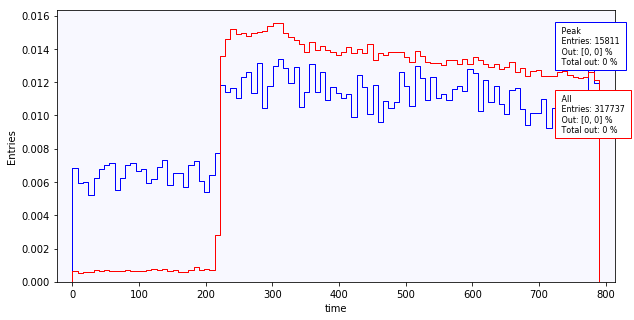

In [24]:
histo1D(S1_icversion  [S1_icversion["energy_fraction_most_active_PMT"]>80]["time"],
        S1_icversion["time"],
        bins=100,
        xlabel="time",
        Label0="Peak",
        Label1="All",
        scale = "linear",
        normalize=True)

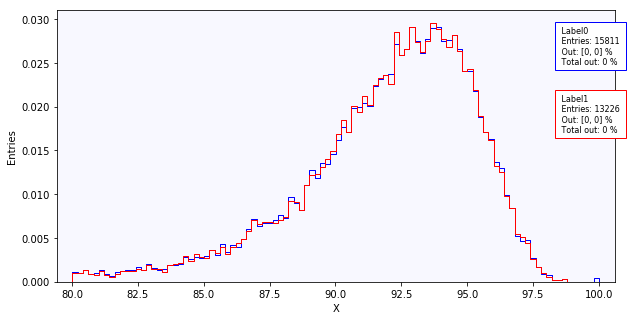

In [25]:
data = S1_icversion  [S1_icversion["energy_fraction_most_active_PMT"]>80]
histo1D(data["energy_fraction_most_active_PMT"],
        data[data["time"]>200]["energy_fraction_most_active_PMT"],
        bins=100,
        normalize=True)

## S2

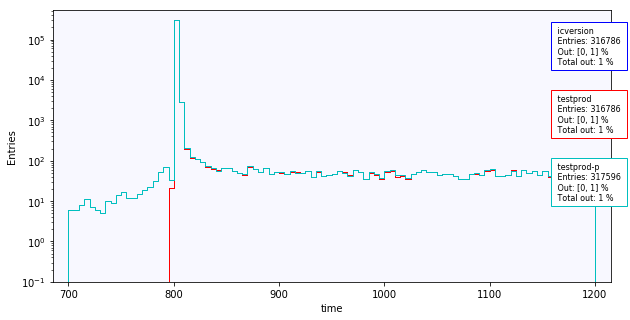

In [26]:
key = "time"
histo1D(S2_icversion [key].values,
        S2_testprod  [key].values,
        S2_testprod_p[key].values,
        xlabel = key,
        Label0 = "icversion",
        Label1 = "testprod",
        Label2 = "testprod-p",
        bins=100,
        xlims = [700, 1200],
        scale="log")

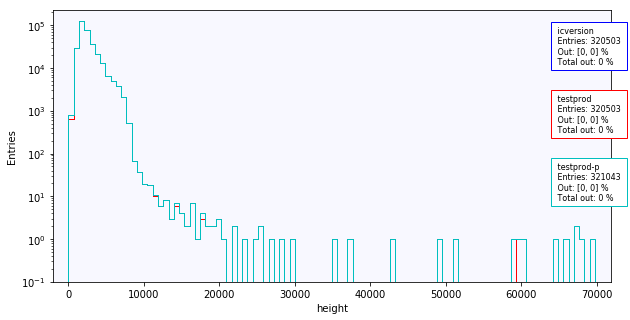

In [27]:
key = "height"
histo1D(S2_icversion [key].values,
        S2_testprod  [key].values,
        S2_testprod_p [S2_testprod_p["time"].values>=795][key].values,
        xlabel = key,
        Label0 = "icversion",
        Label1 = "testprod",
        Label2 = "testprod-p",
        bins=100, 
        xlims=[None, None],
        scale = "log")

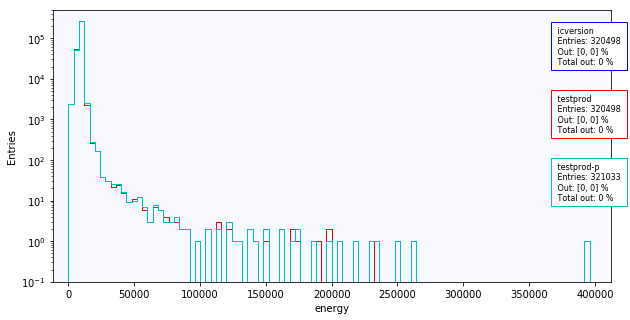

In [28]:
key = "energy"
histo1D(S2_icversion [key].values,
        S2_testprod  [key].values,
        S2_testprod_p[S2_testprod_p["time"].values>=795][key].values,
        xlabel = key,
        Label0 = "icversion",
        Label1 = "testprod",
        Label2 = "testprod-p",
        bins=100, 
        xlims=[None, 4e5],
        scale = "log")

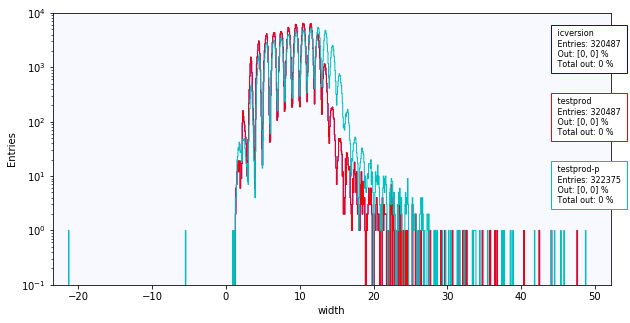

In [29]:
key = "width"
histo1D(S2_icversion [key].values*10**-3,
        S2_testprod  [key].values*10**-3,
        S2_testprod_p[key].values*10**-3,
        xlabel = key,
        Label0 = "icversion",
        Label1 = "testprod",
        Label2 = "testprod-p",
        bins=1000, 
        xlims=[None, 50],
        scale = "log")

In [30]:
np.mean(S2_testprod_p [S2_testprod_p["time"].values>=795][key].values)

10295.848802769411

In [31]:
np.mean(S2_testprod [key].values)

9001.123200874876

In [32]:
np.mean(S2_icversion [key].values)

9001.123200874876

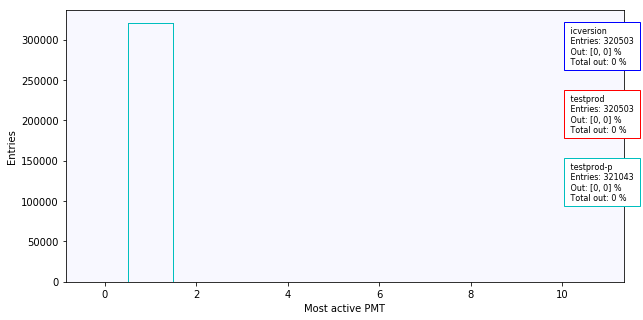

In [33]:
key = "most_active_PMT"
histo1D(S2_icversion [key].values,
        S2_testprod  [key].values,
        S2_testprod_p [S2_testprod_p["time"]>=795][key].values,
        xlabel = "Most active PMT",
        Label0 = "icversion",
        Label1 = "testprod",
        Label2 = "testprod-p",
        bins=np.arange(-0.5, 12.5), 
        xlims=[-0.5, None],
        scale = "linear")

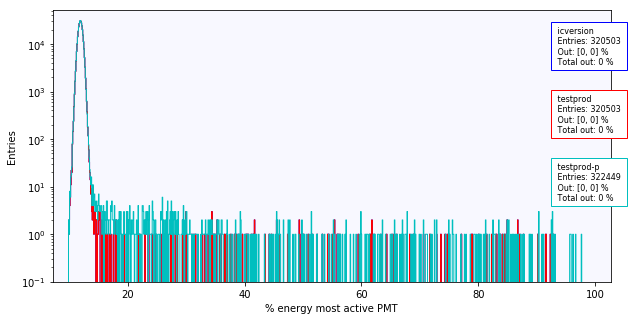

In [34]:
key = "energy_fraction_most_active_PMT"
histo1D(S2_icversion [key].values,
        S2_testprod  [key].values,
        S2_testprod_p[key].values,
        xlabel = "% energy most active PMT",
        Label0 = "icversion",
        Label1 = "testprod",
        Label2 = "testprod-p",
        bins=1000, 
        xlims=[None, 100],
        scale = "log")

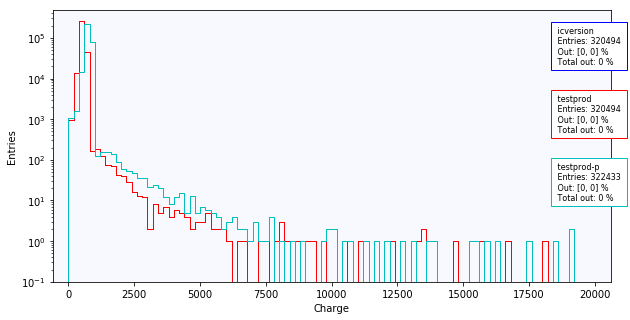

In [35]:
key = "charge"
histo1D(S2_icversion [key].values,
        S2_testprod  [key].values,
        S2_testprod_p[key].values,
        xlabel = "Charge",
        Label0 = "icversion",
        Label1 = "testprod",
        Label2 = "testprod-p",
        bins=100, 
        xlims=[None, 2e4],
        scale = "log")

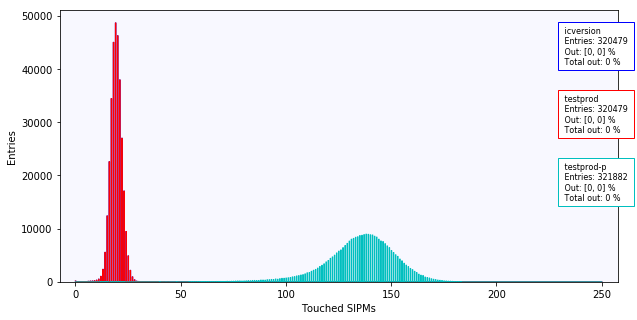

In [36]:
key = "touched_sipms"
histo1D(S2_icversion [key].values,
        S2_testprod  [key].values,
        S2_testprod_p[key].values,
        xlabel = "Touched SIPMs",
        Label0 = "icversion",
        Label1 = "testprod",
        Label2 = "testprod-p",
        bins=1000, 
        xlims=[None, 250],
        scale = "linear")

# Slide

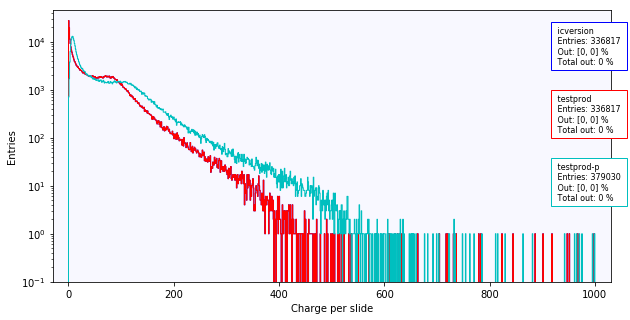

In [37]:
key = "charge"
histo1D(Sld_icversion [key].values,
        Sld_testprod  [key].values,
        Sld_testprod_p[key].values,
        xlabel = "Charge per slide",
        Label0 = "icversion",
        Label1 = "testprod",
        Label2 = "testprod-p",
        bins=1000, 
        xlims=[None, 1e3],
        scale = "log")

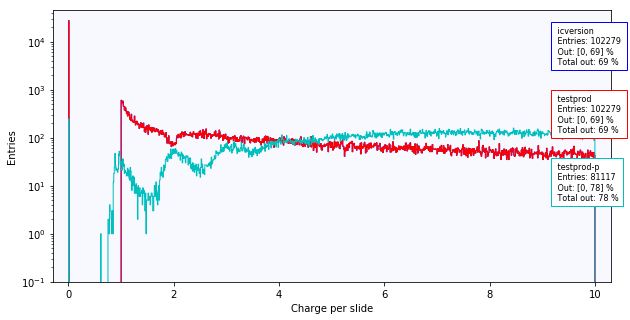

In [38]:
key = "charge"
histo1D(Sld_icversion [key].values,
        Sld_testprod  [key].values,
        Sld_testprod_p[key].values,
        xlabel = "Charge per slide",
        Label0 = "icversion",
        Label1 = "testprod",
        Label2 = "testprod-p",
        bins=1000, 
        xlims=[None, 10],
        scale = "log")

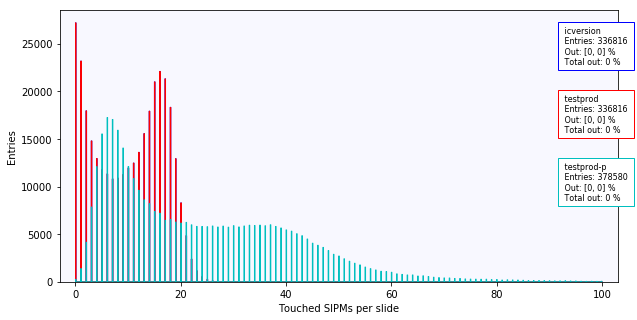

In [39]:
key = "touched_sipms"
histo1D(Sld_icversion [key].values,
        Sld_testprod  [key].values,
        Sld_testprod_p[key].values,
        xlabel = "Touched SIPMs per slide",
        Label0 = "icversion",
        Label1 = "testprod",
        Label2 = "testprod-p",
        bins=1000, 
        xlims=[None, 100],
        scale = "linear")

## Charge per SIPM

In [40]:
sipm_charge = testprod_p_file.root.SIPM.sipm_charge.read()

/Users/gonzalo/miniconda/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x119bc9730> (for post_execute):


KeyboardInterrupt: 

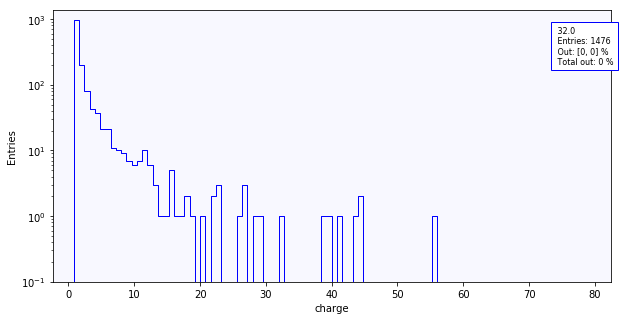

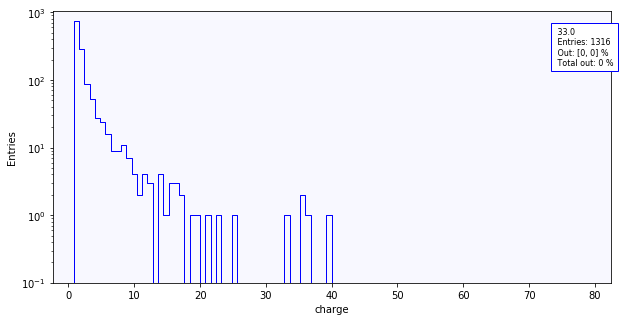

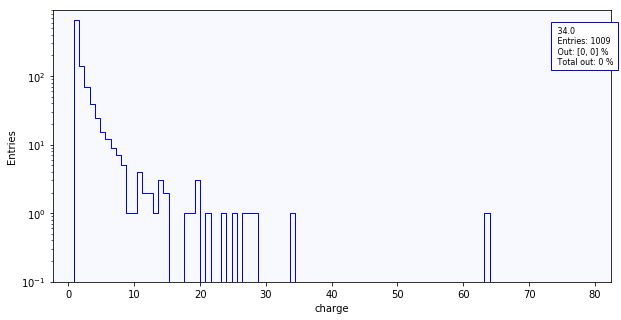

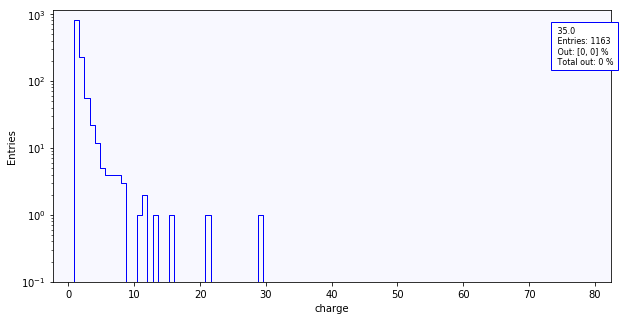

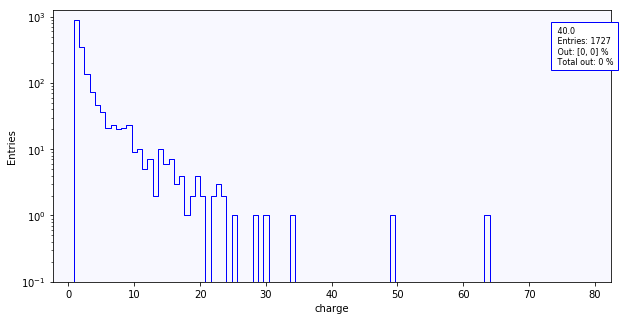

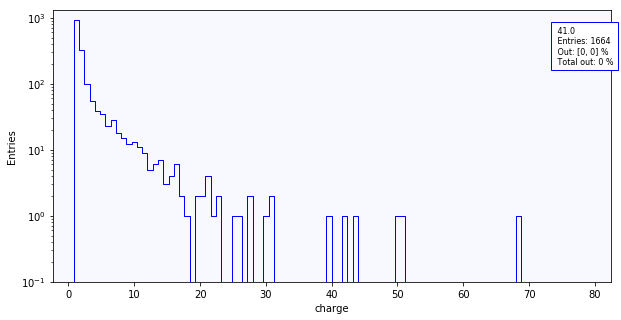

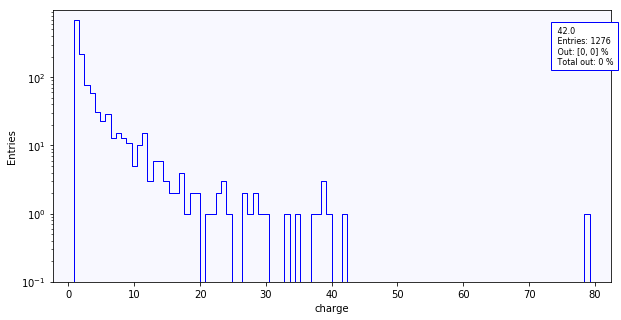

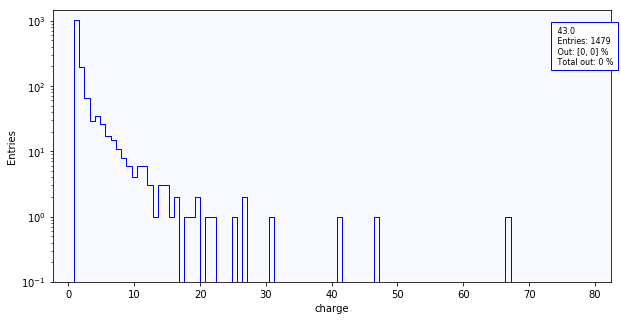

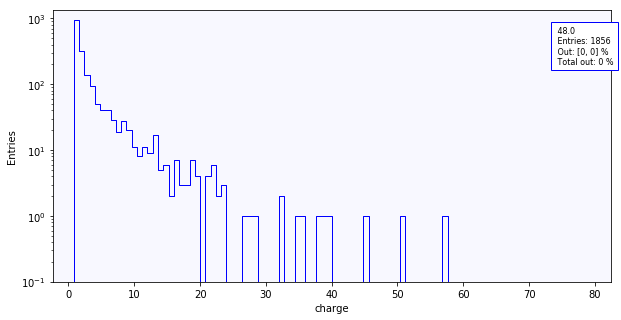

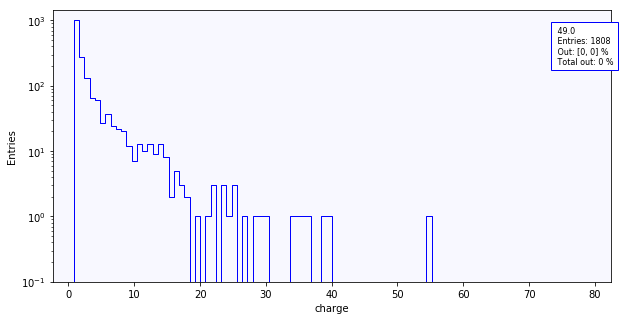

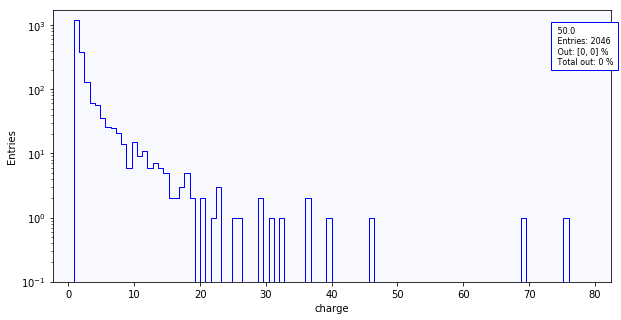

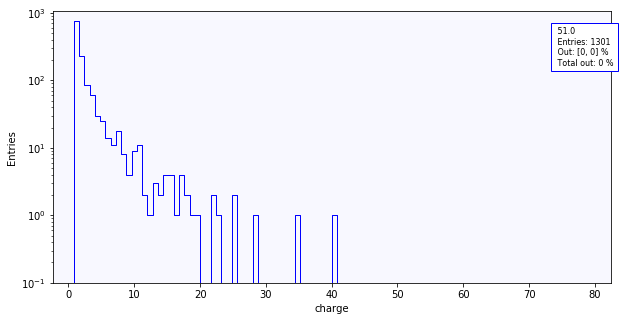

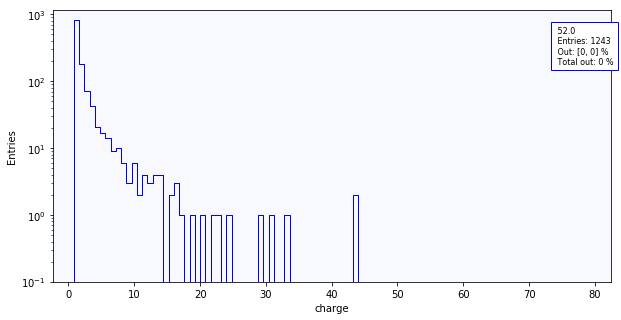

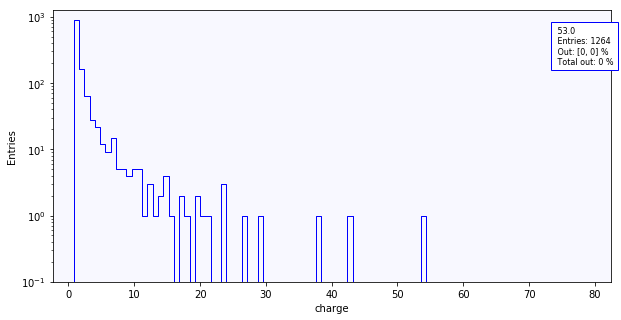

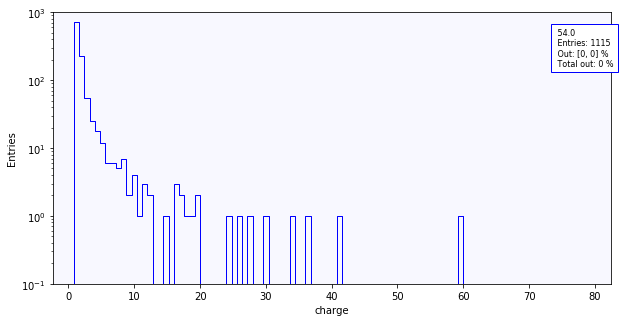

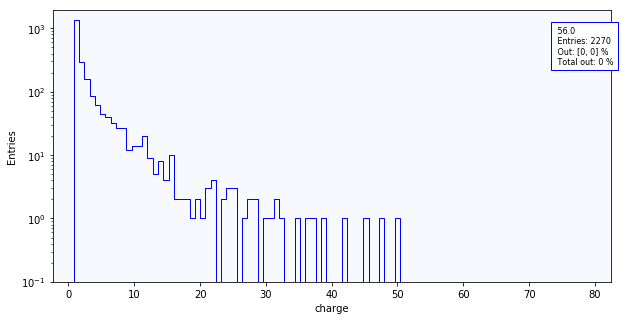

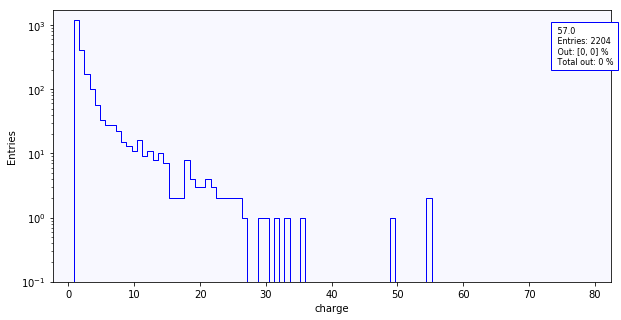

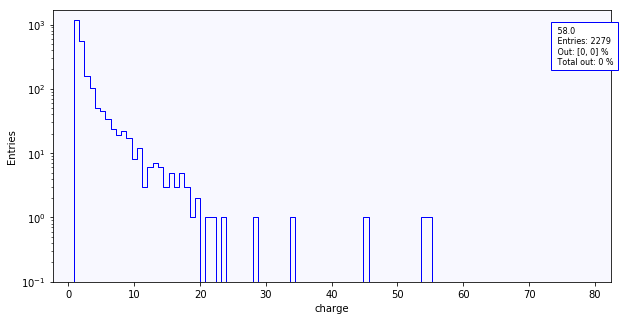

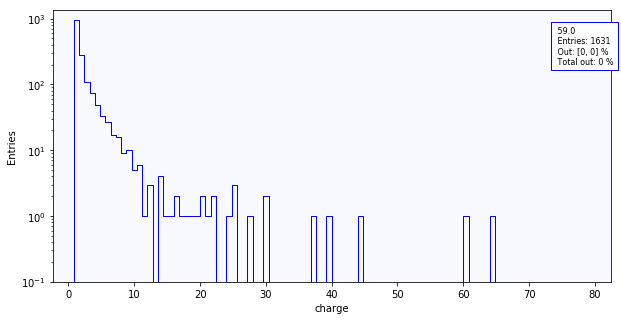

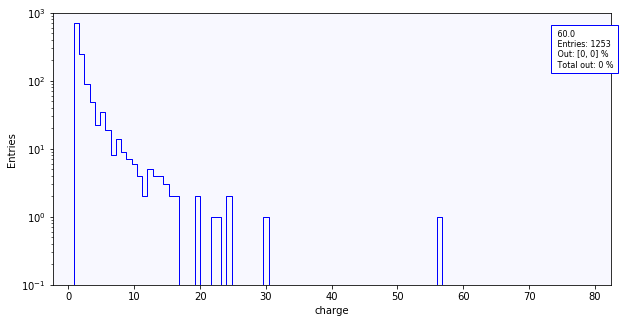

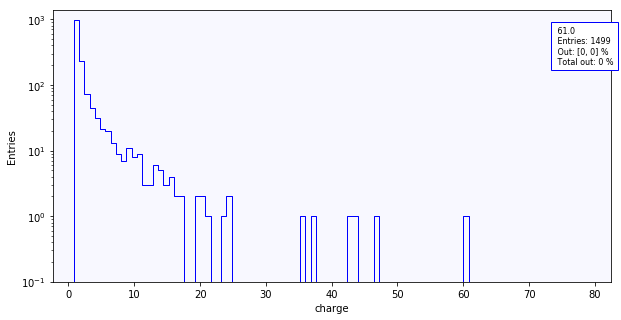

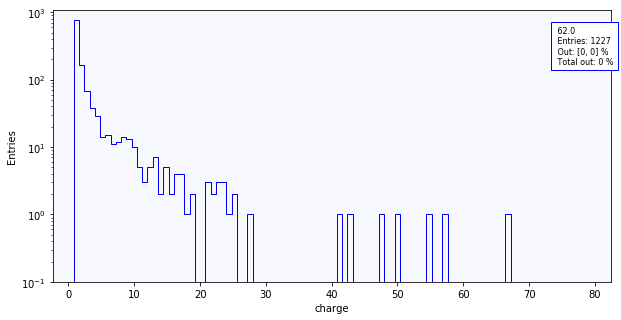

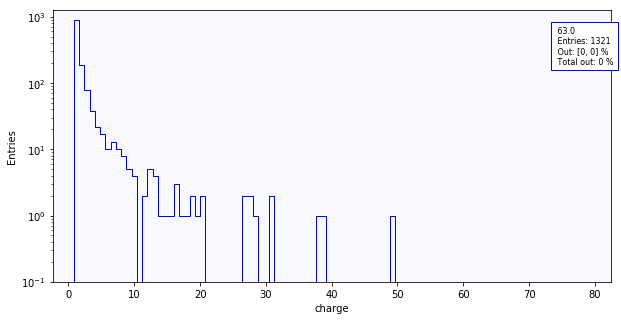

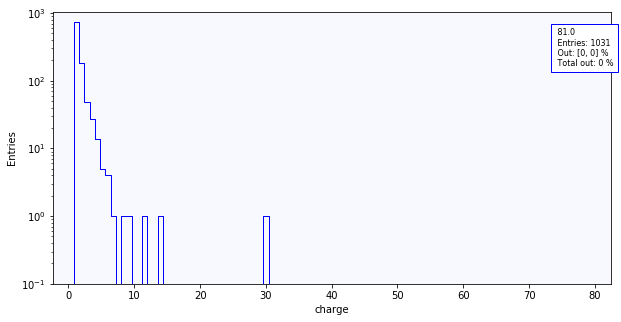

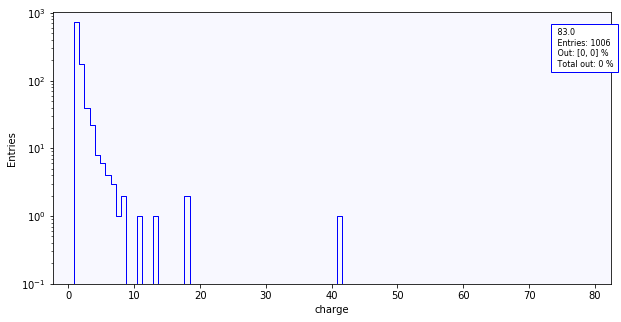

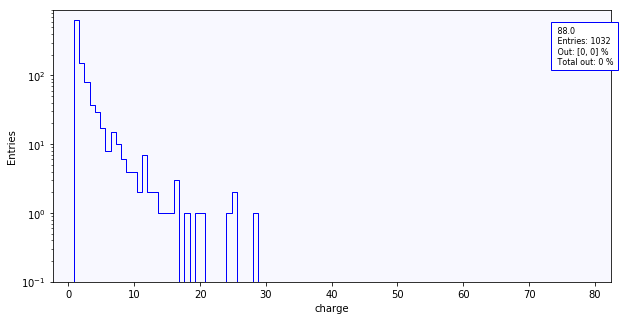

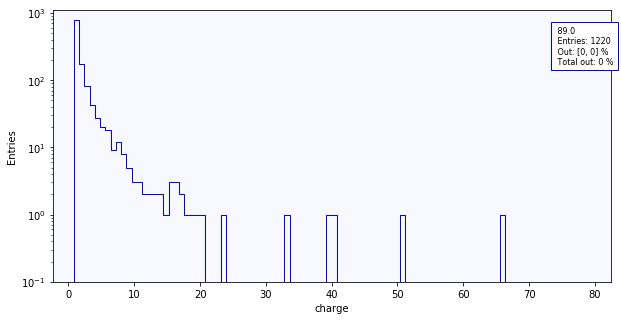

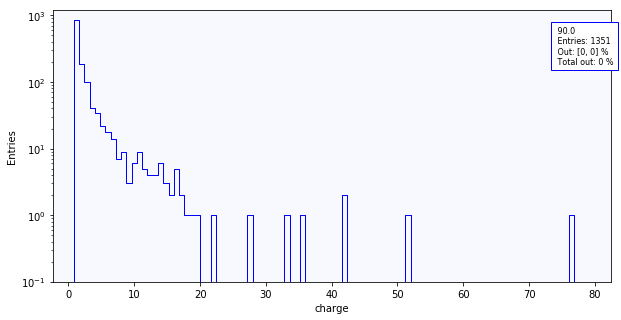

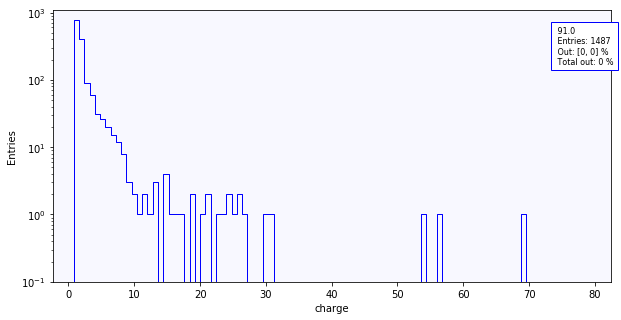

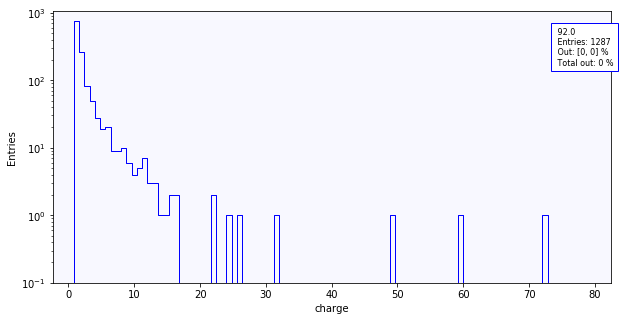

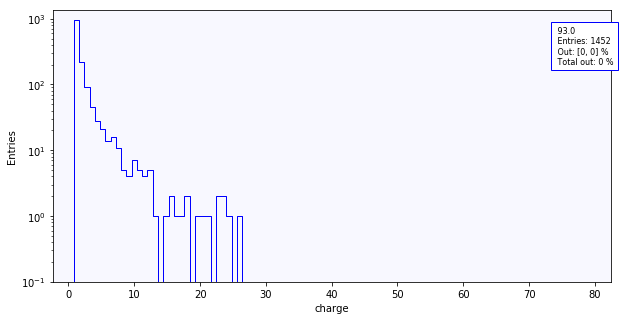

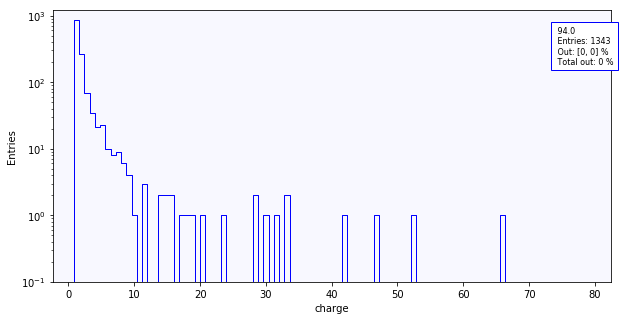

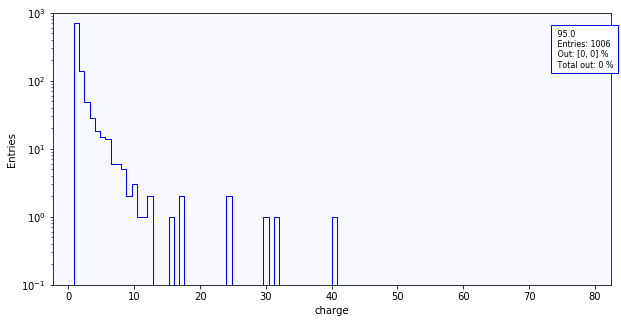

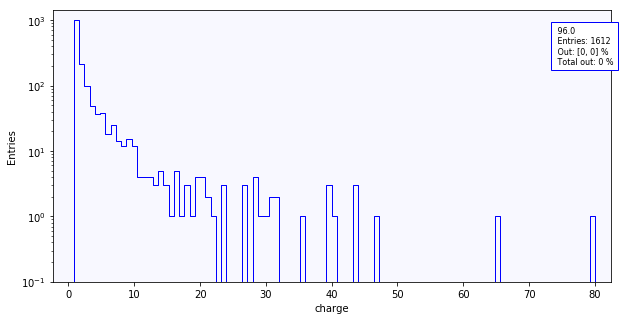

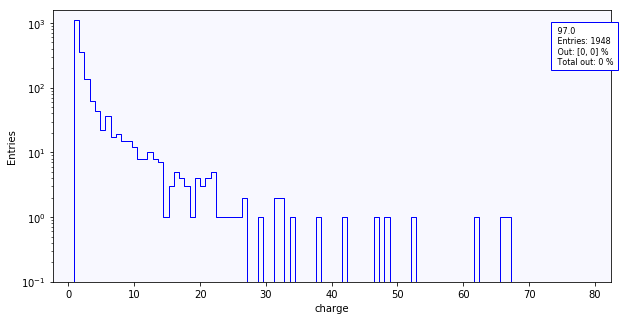

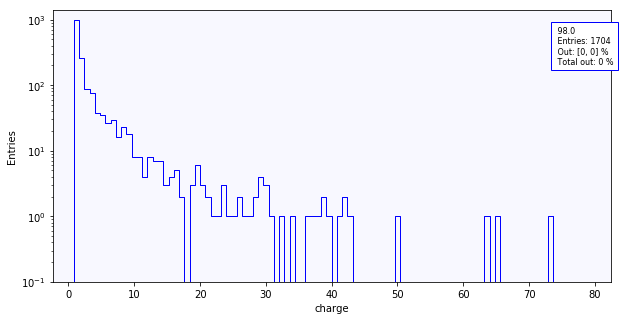

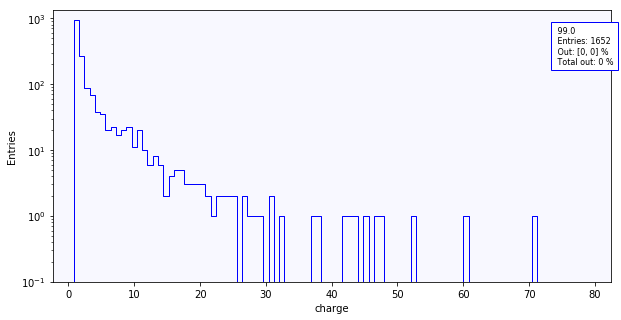

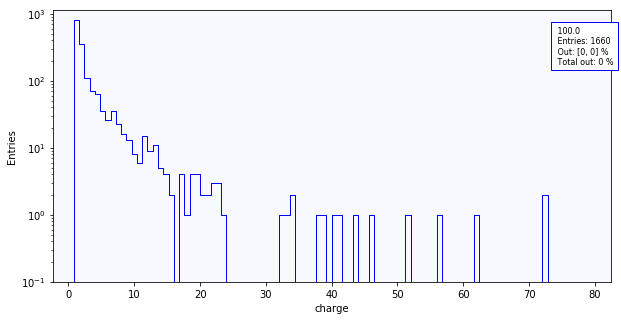

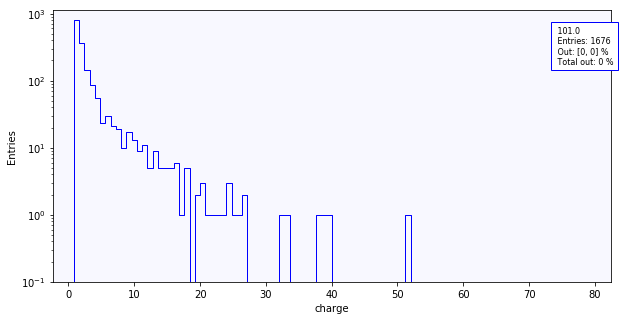

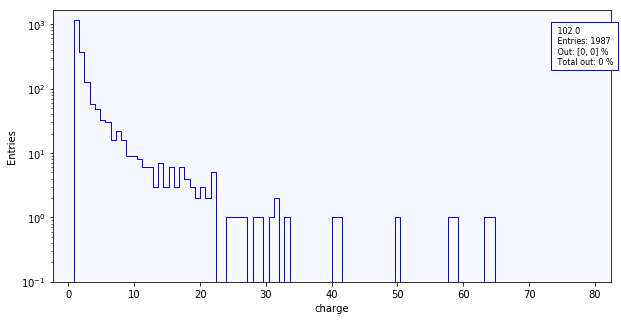

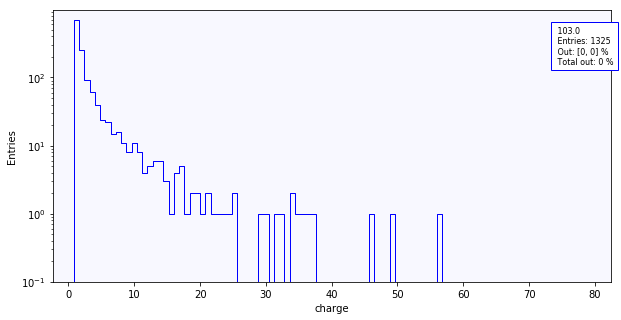

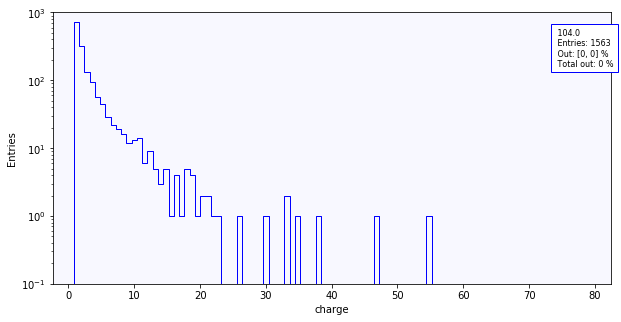

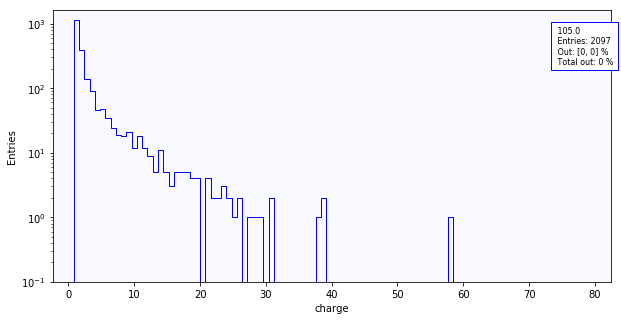

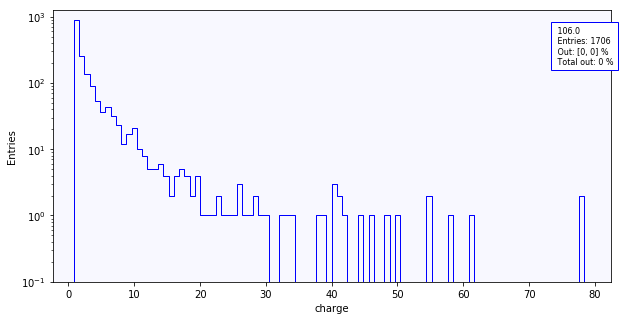

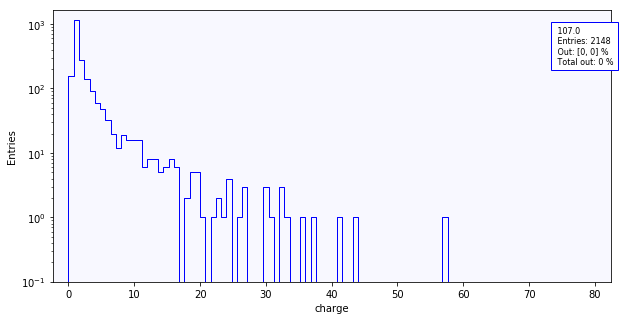

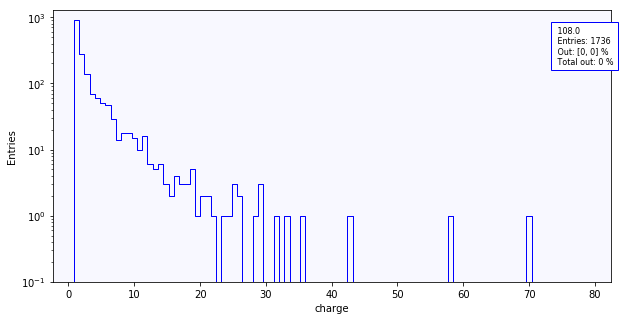

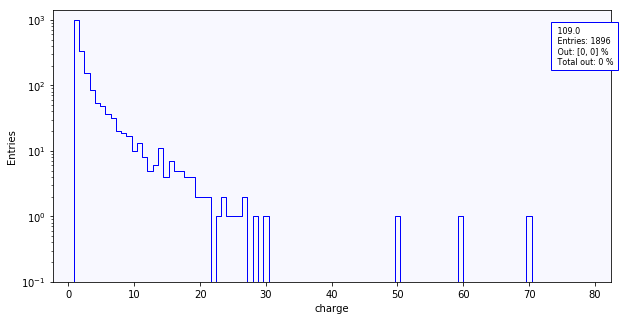

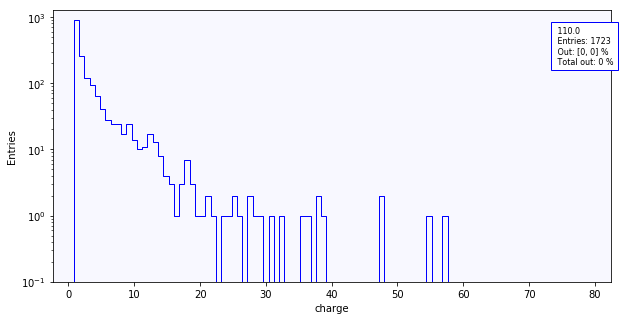

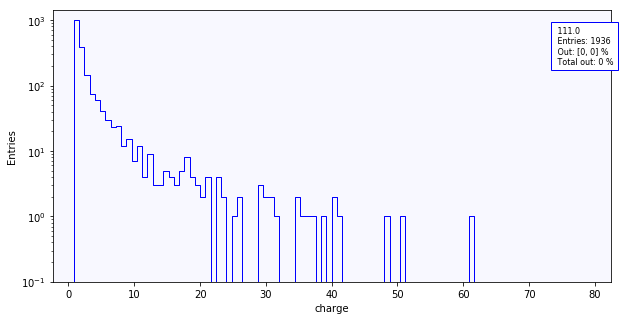

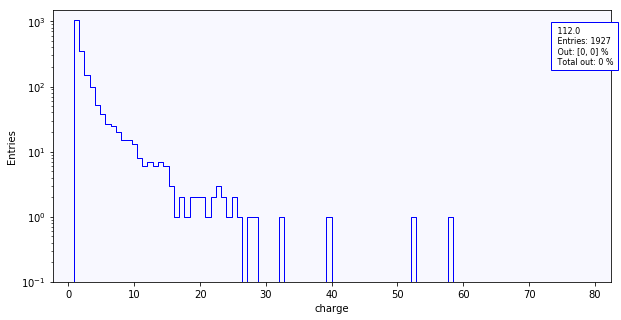

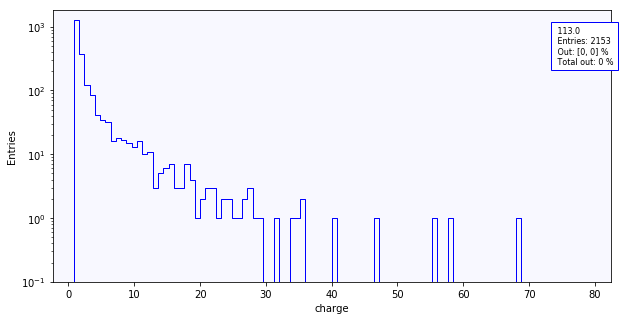

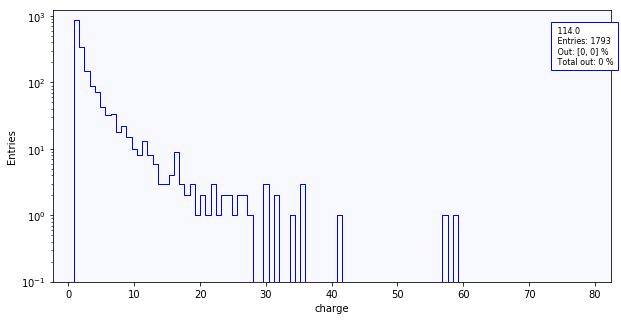

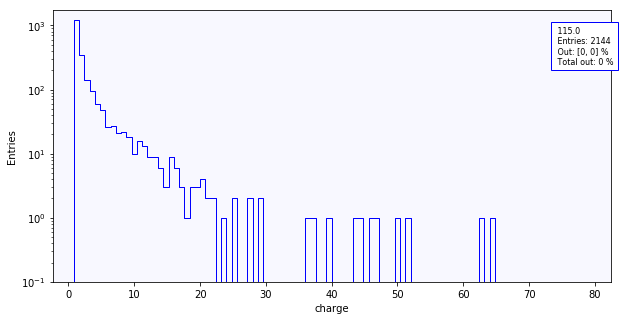

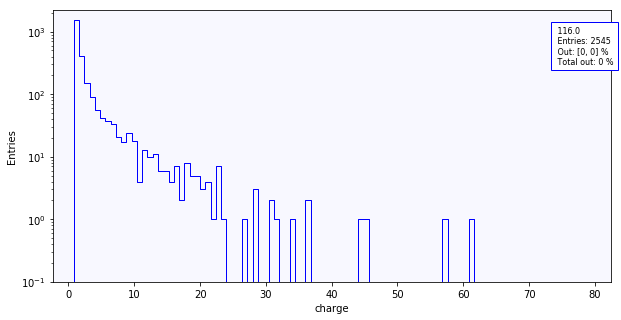

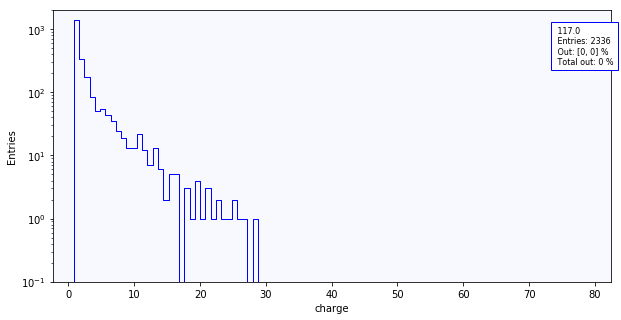

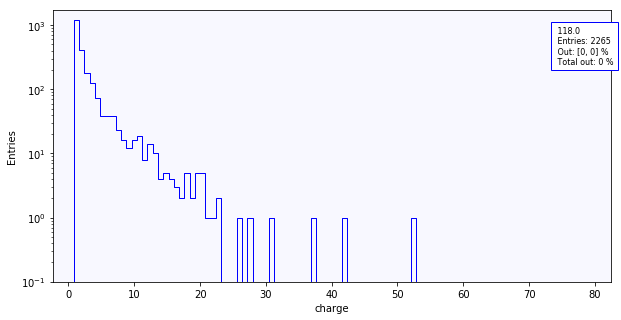

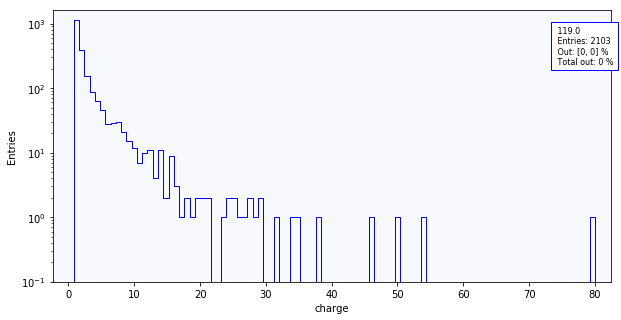

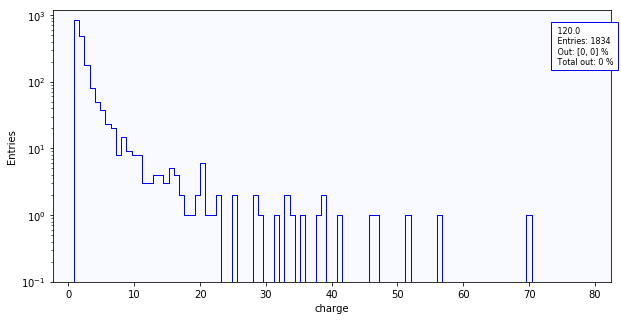

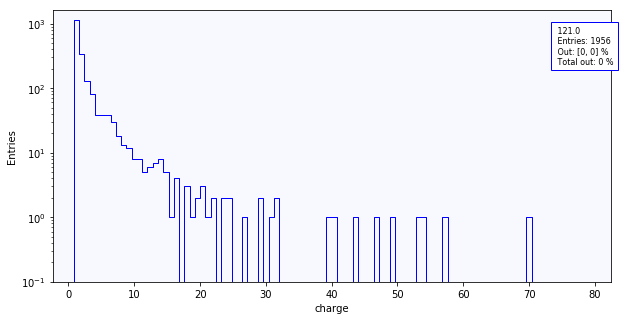

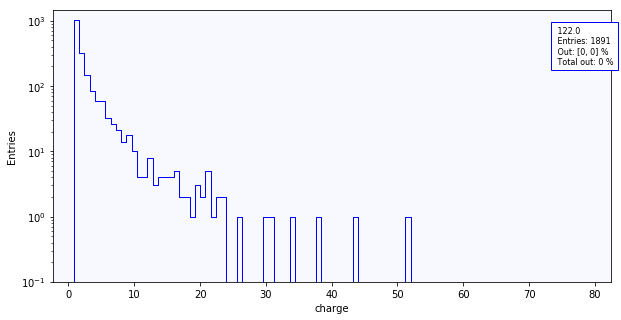

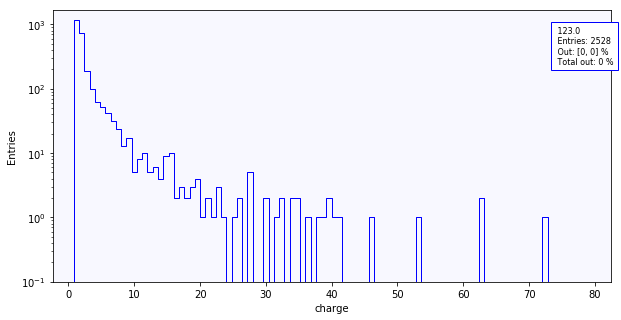

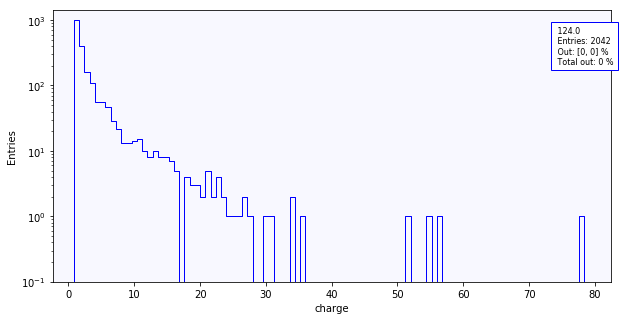

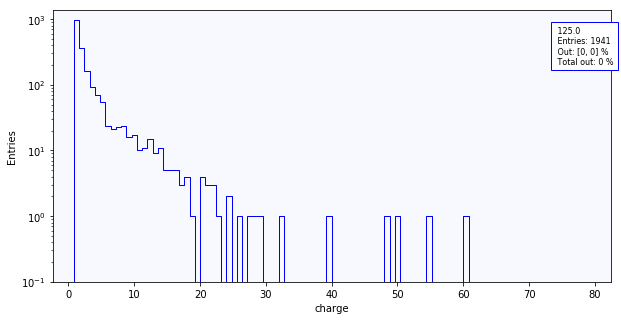

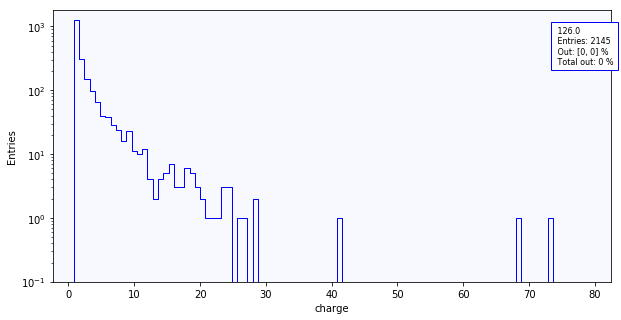

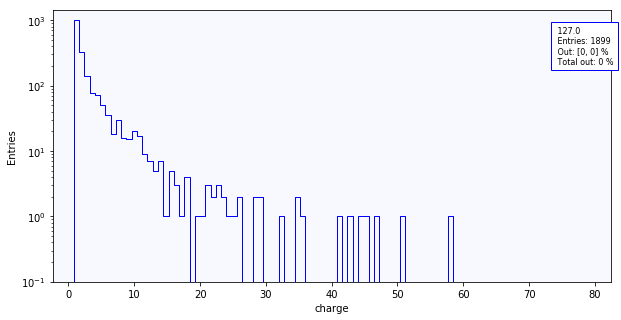

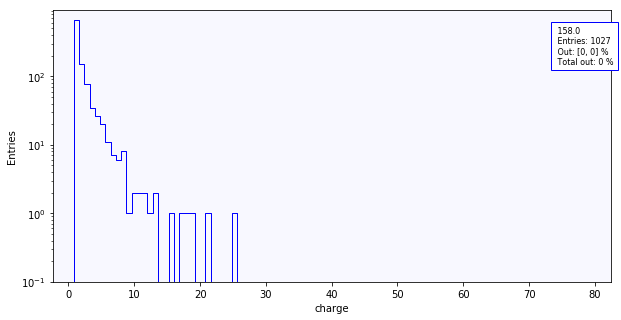

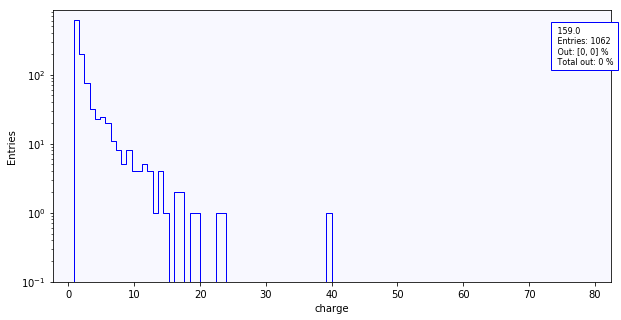

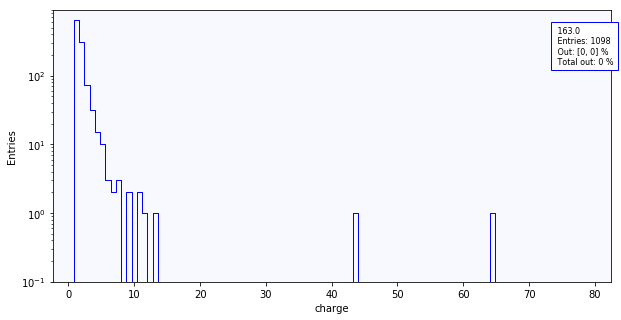

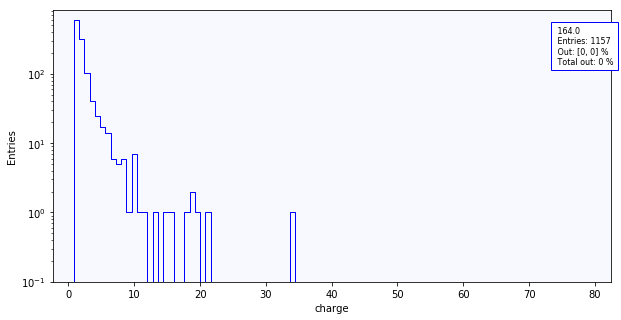

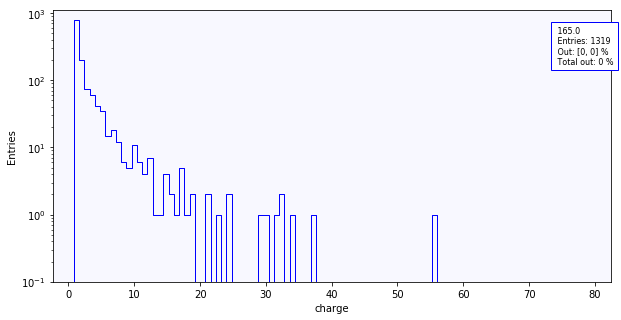

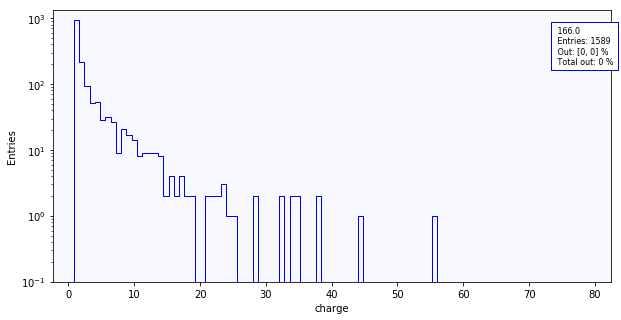

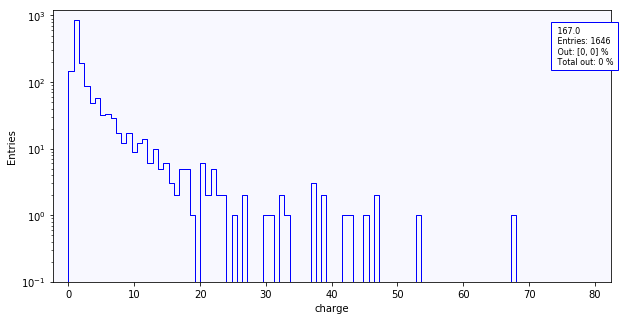

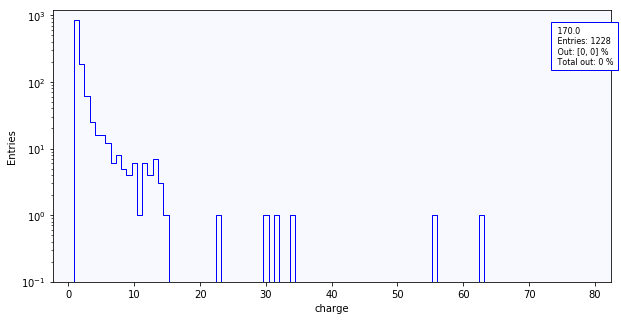

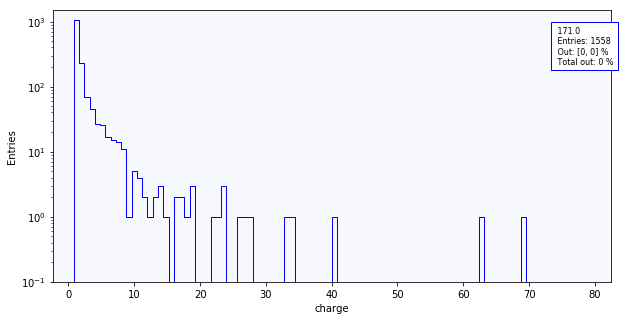

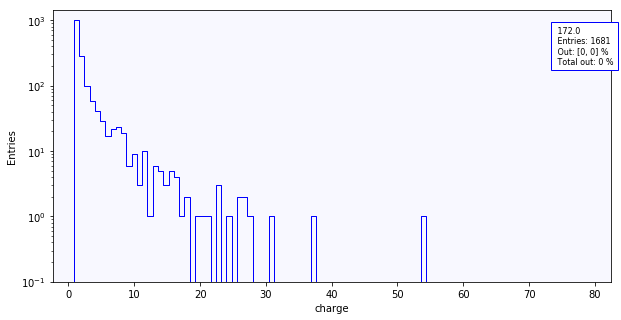

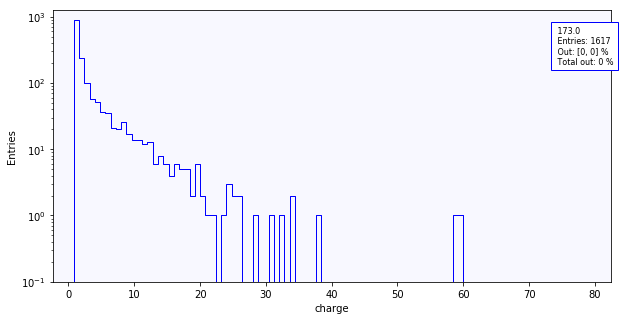

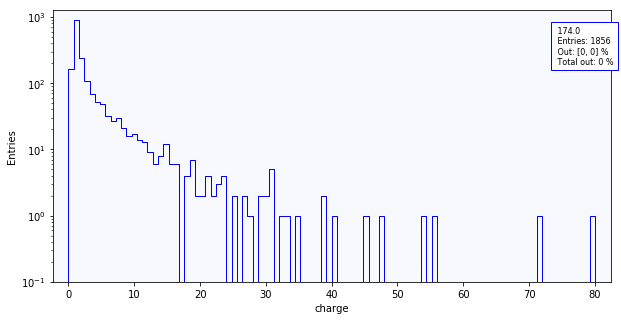

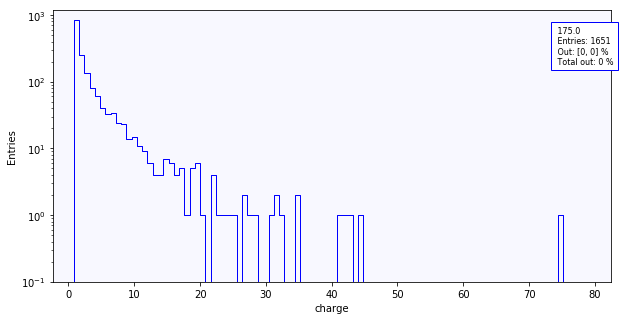

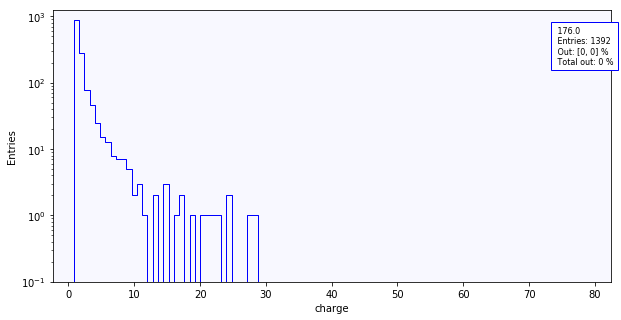

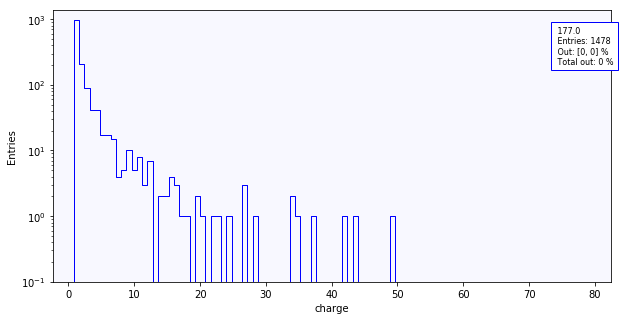

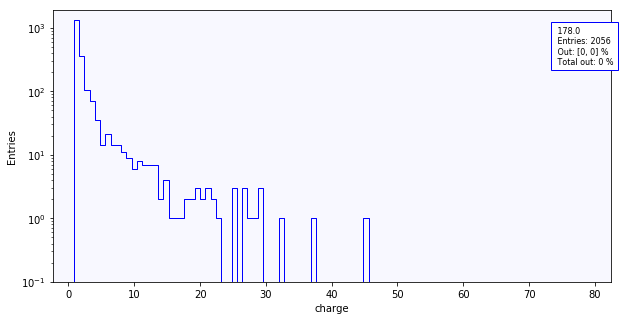

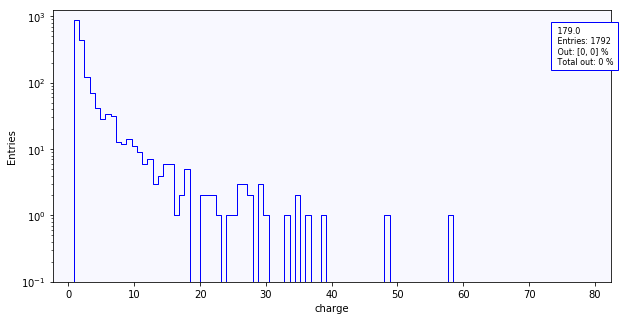

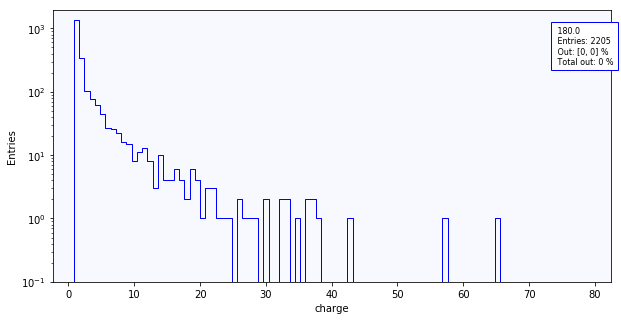

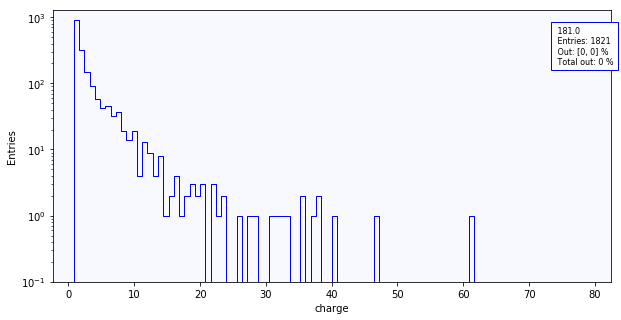

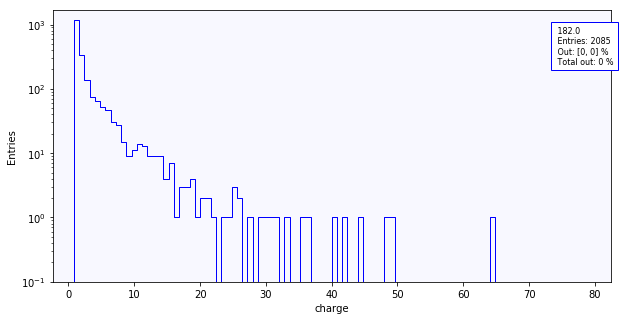

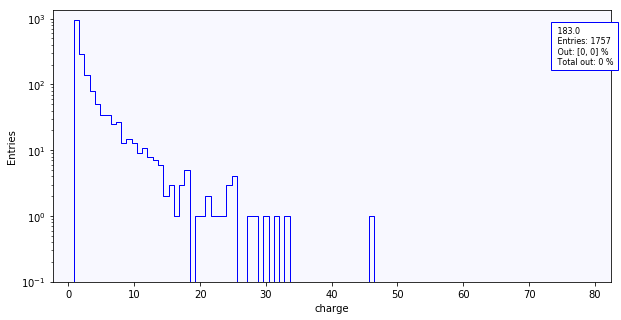

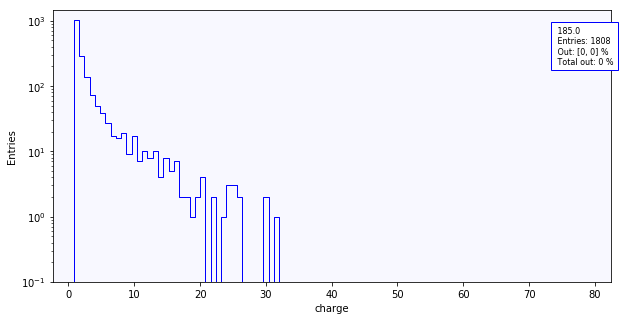

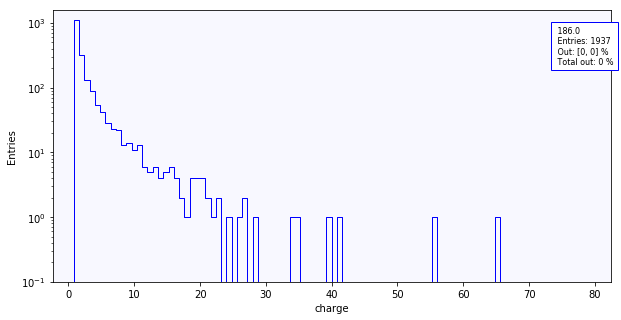

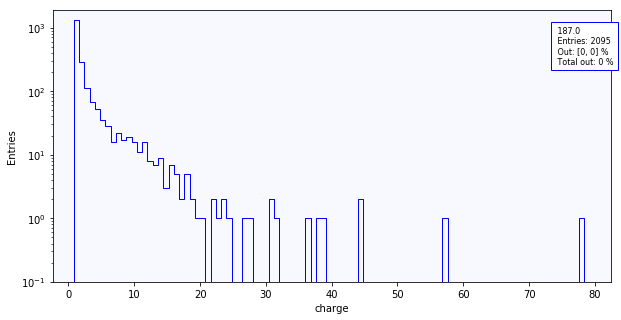

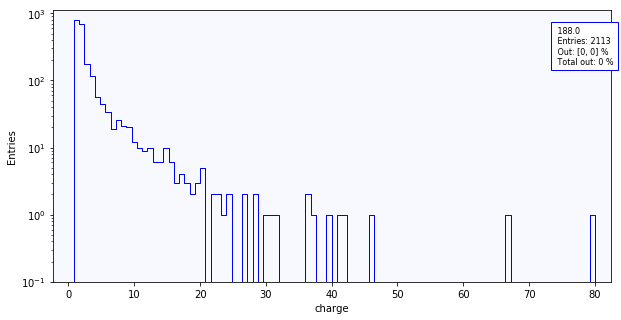

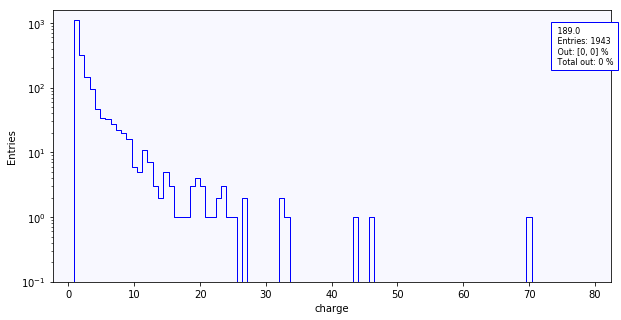

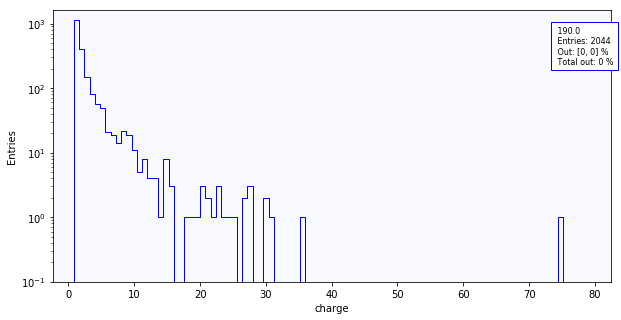

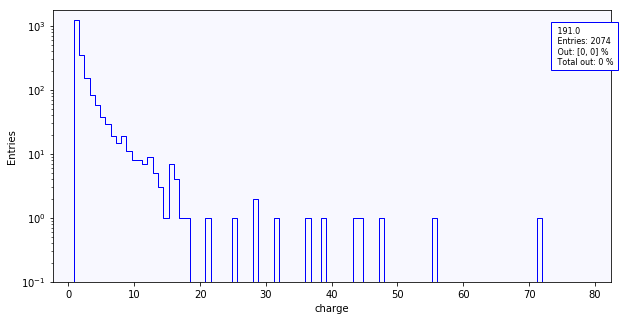

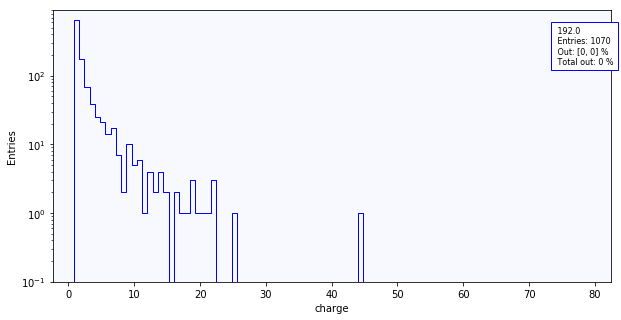

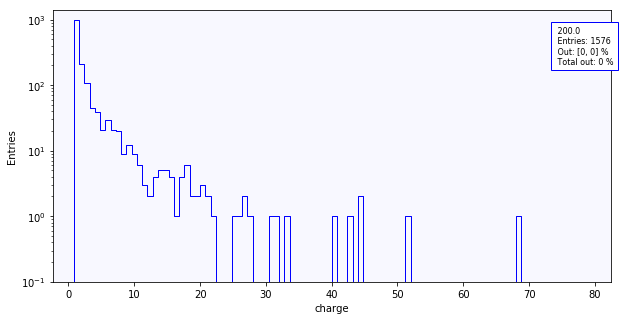

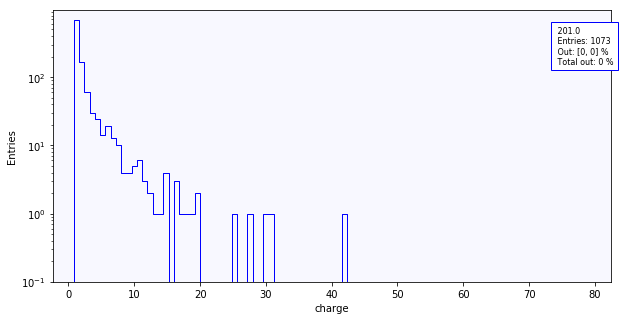

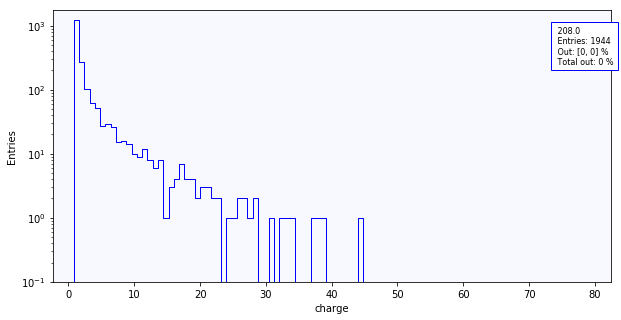

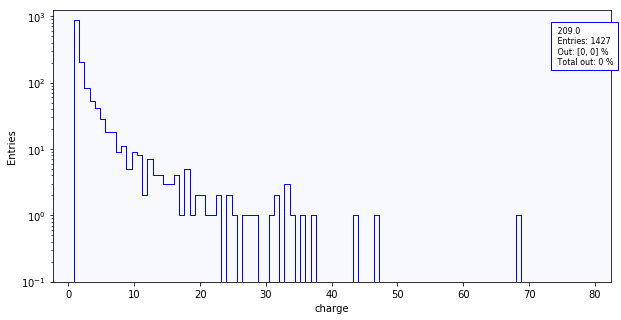

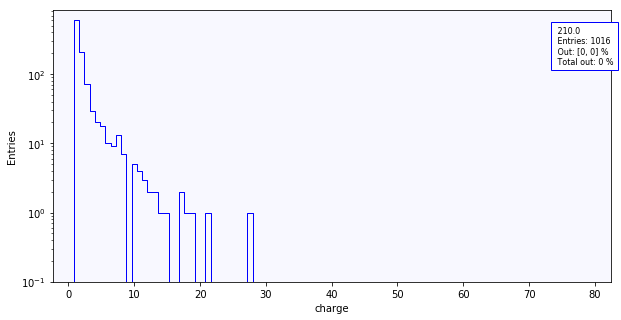

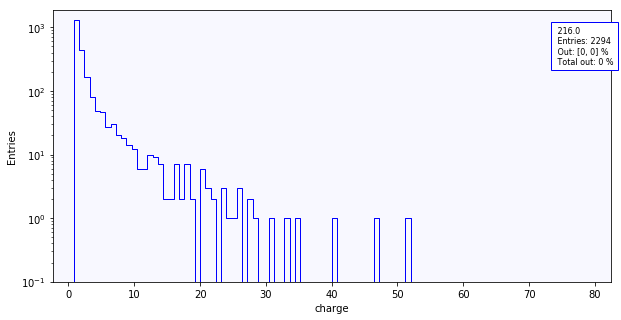

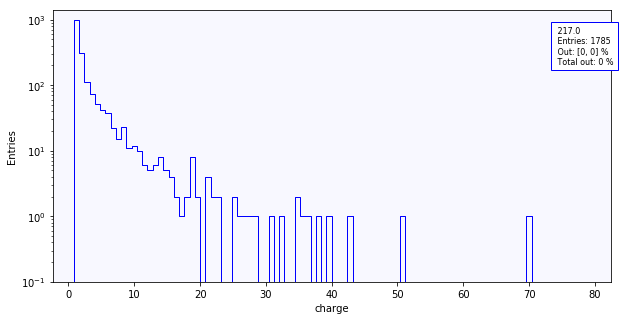

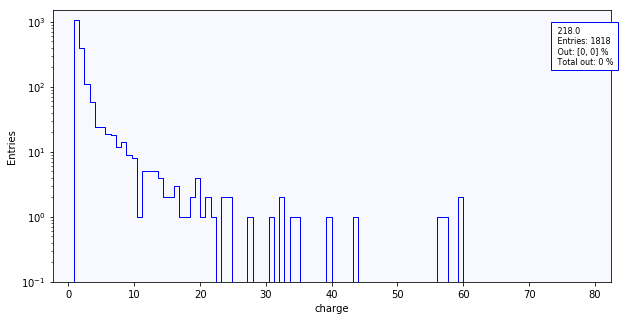

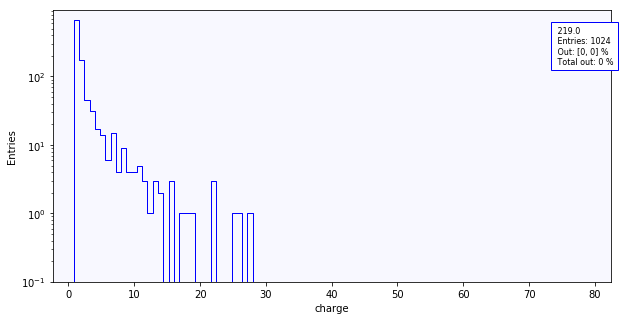

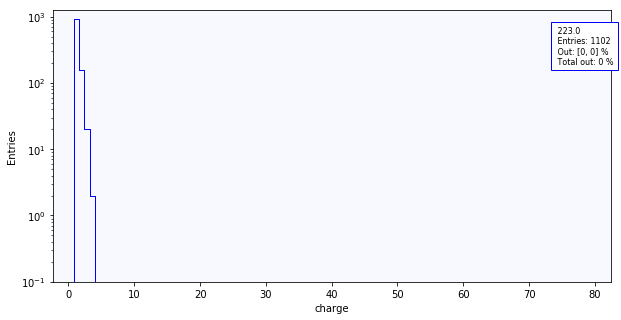

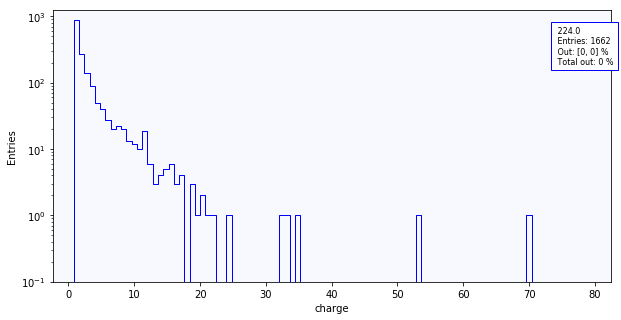

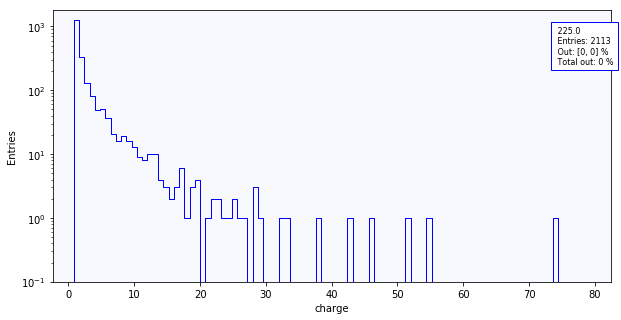

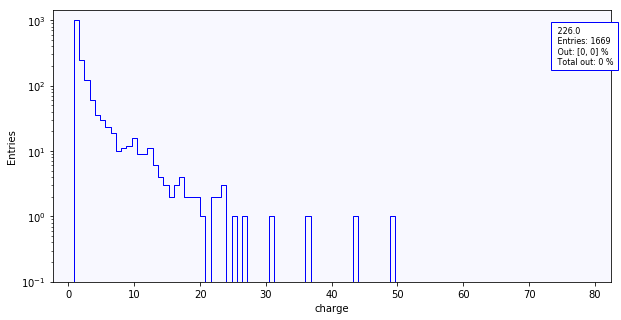

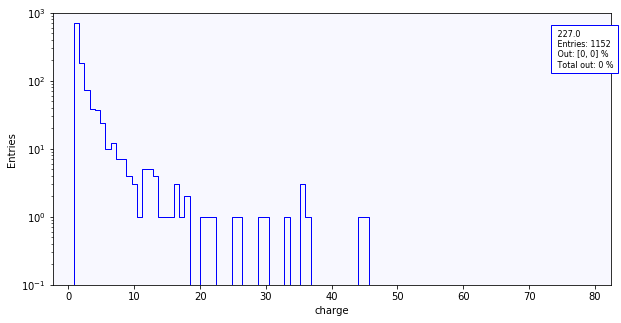

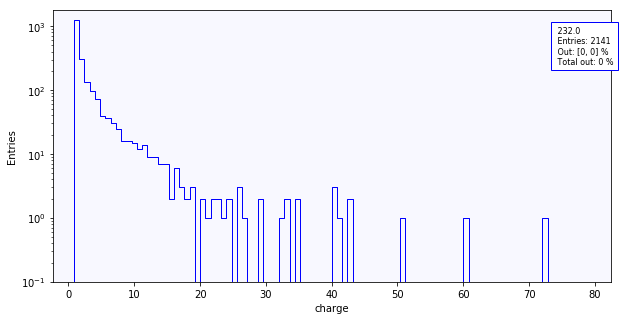

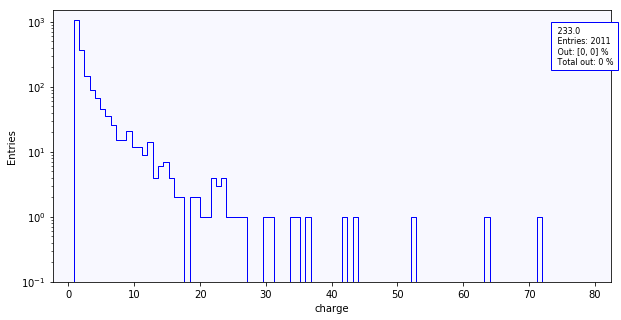

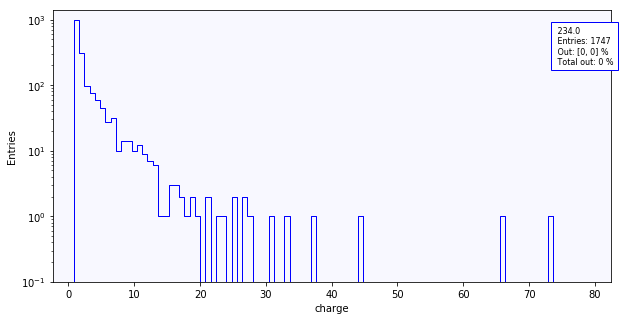

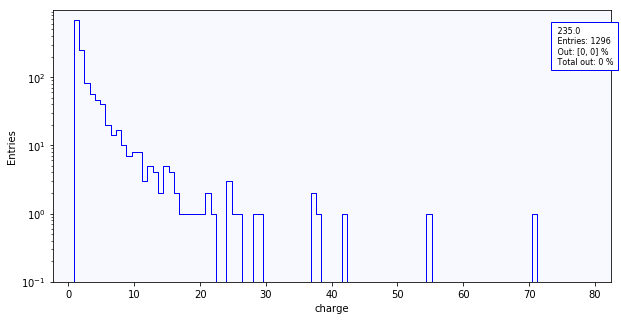

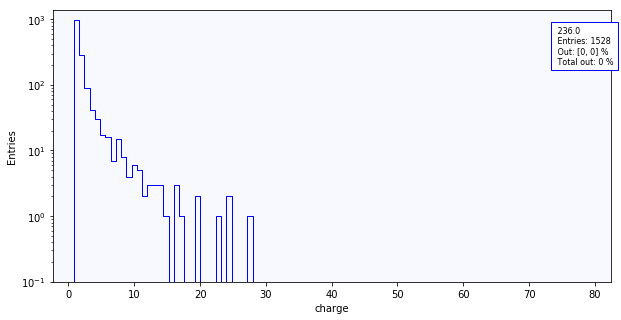

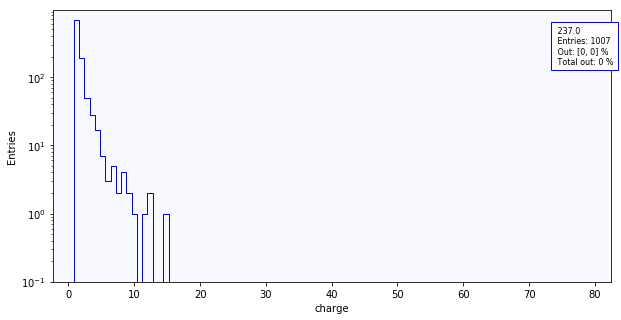

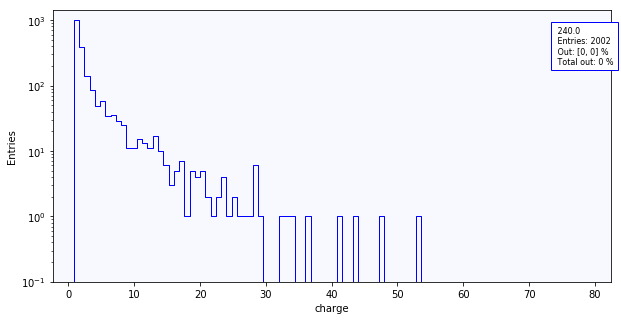

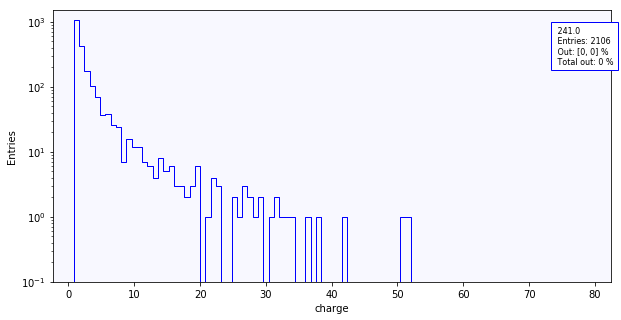

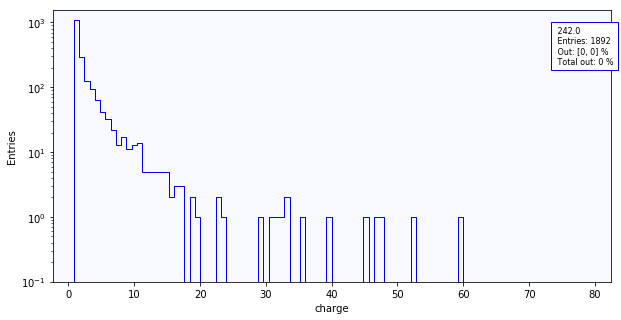

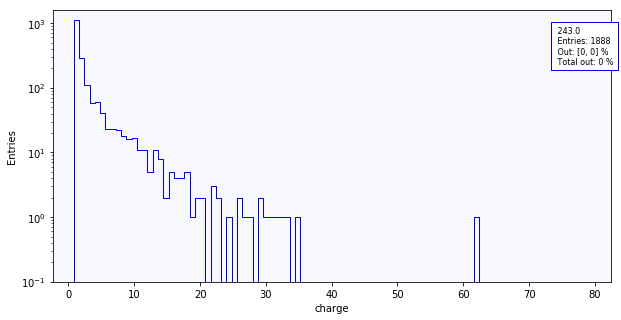

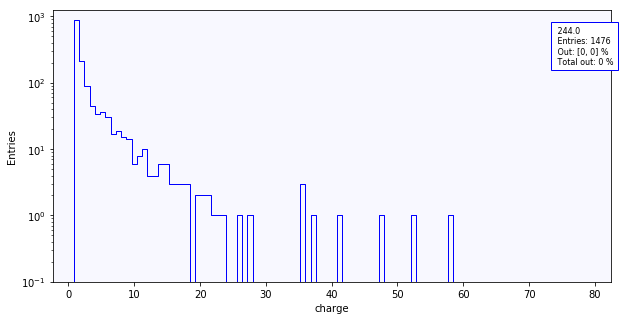

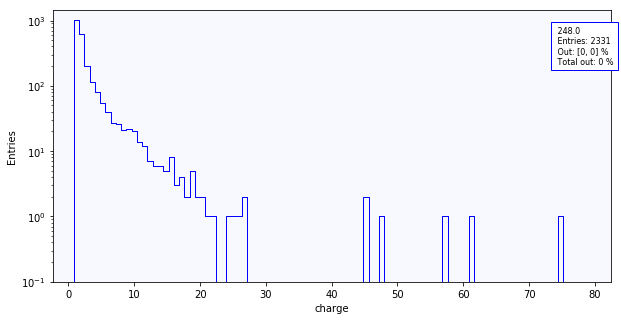

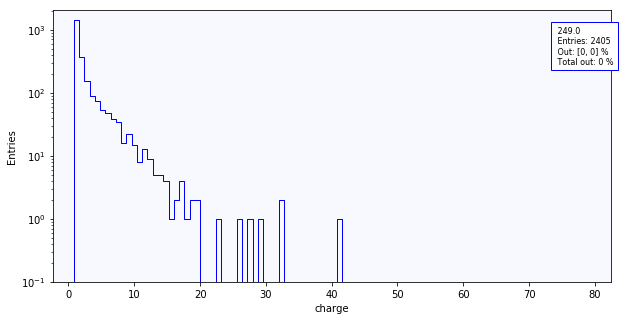

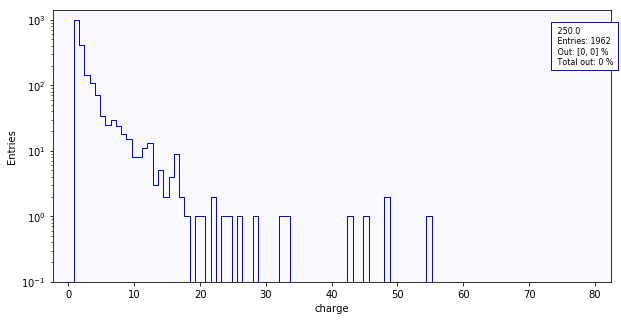

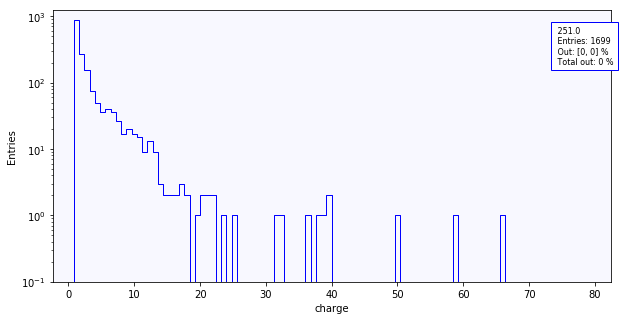

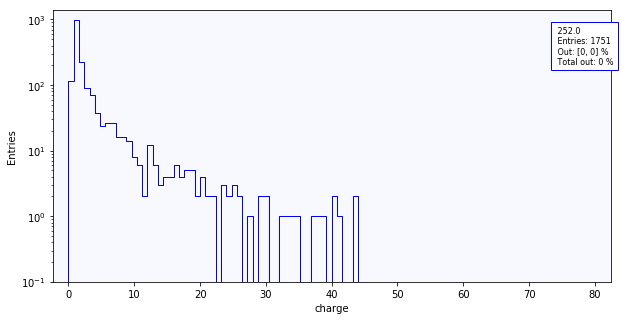

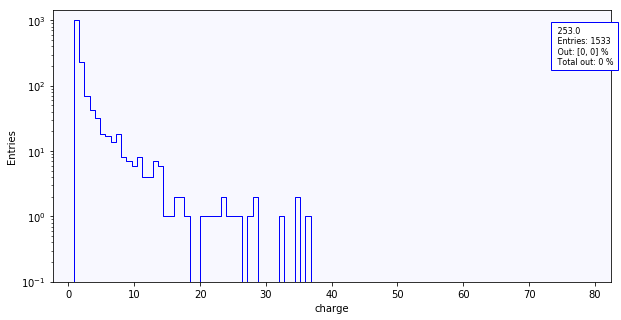

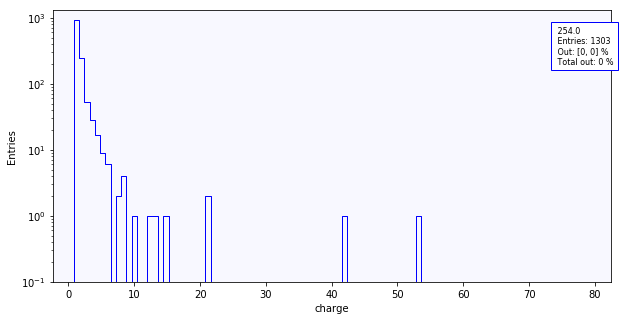

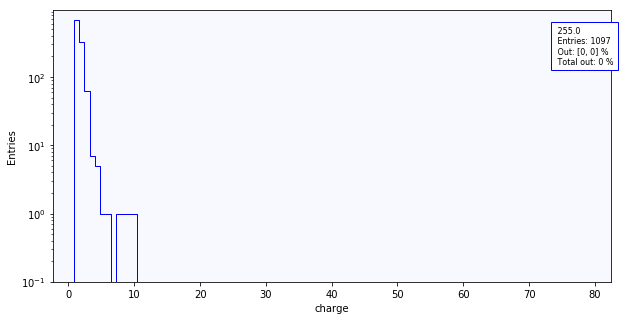

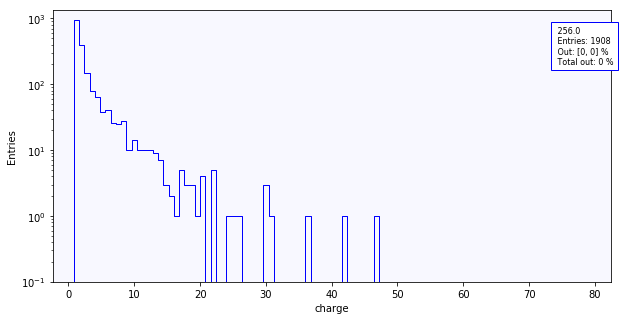

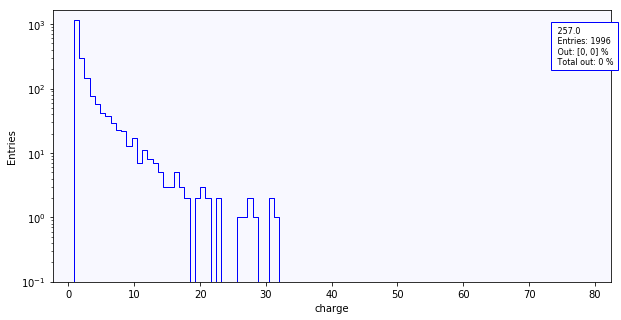

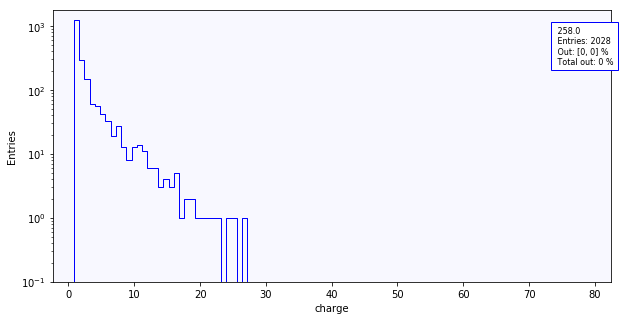

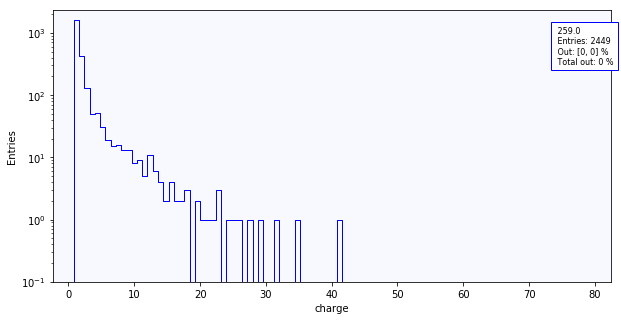

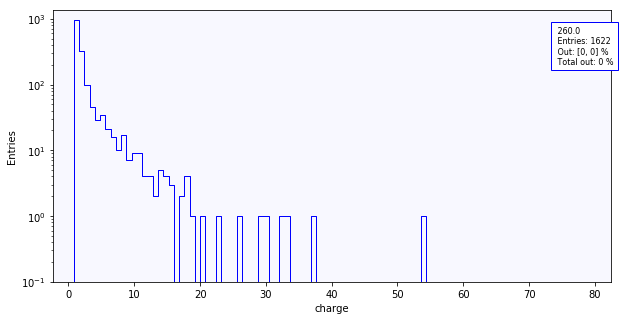

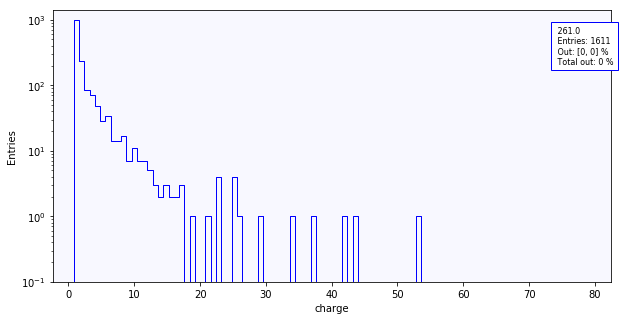

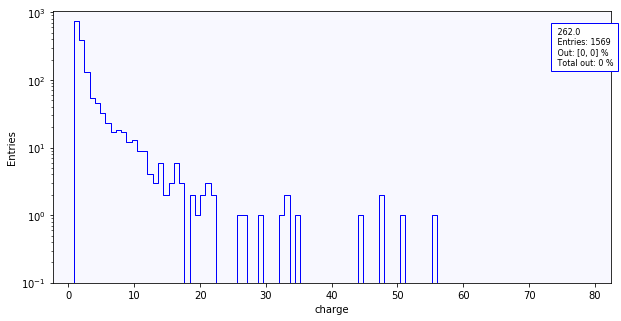

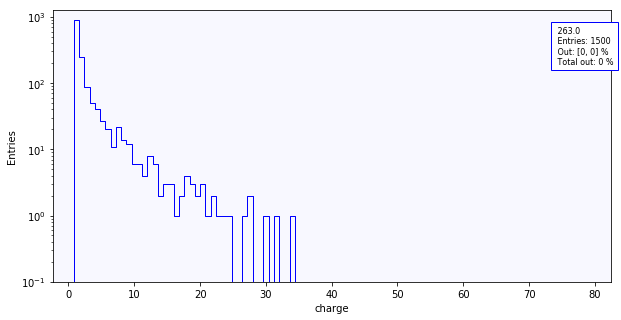

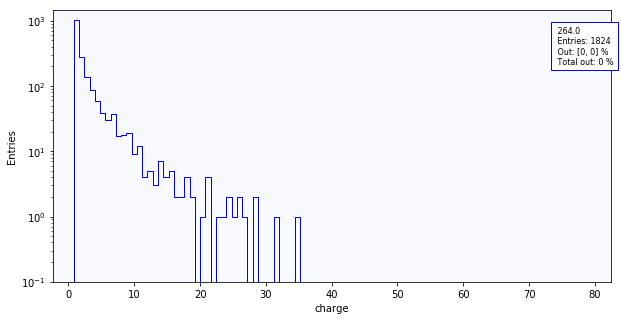

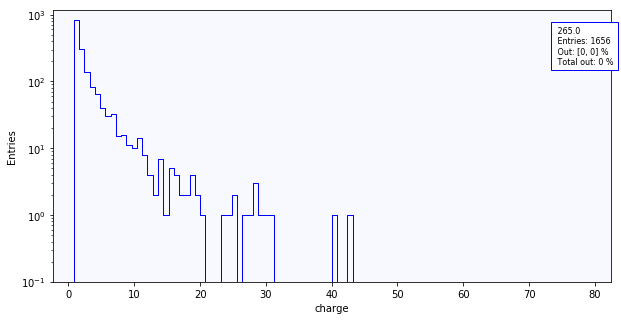

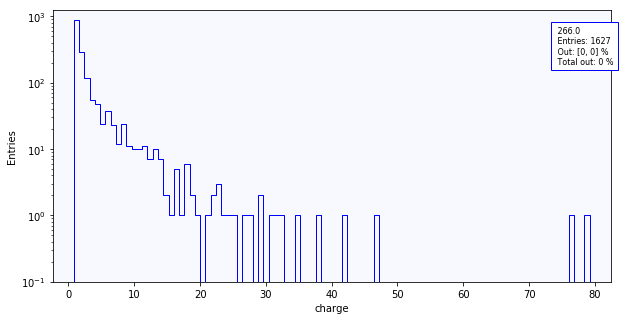

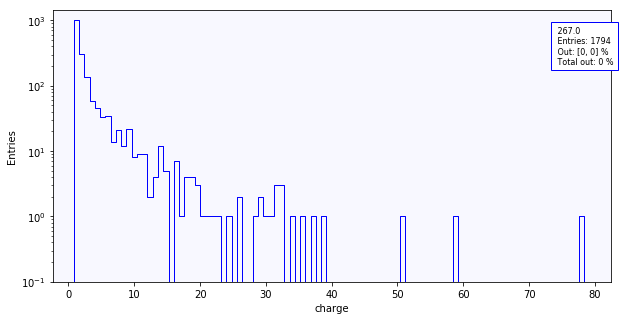

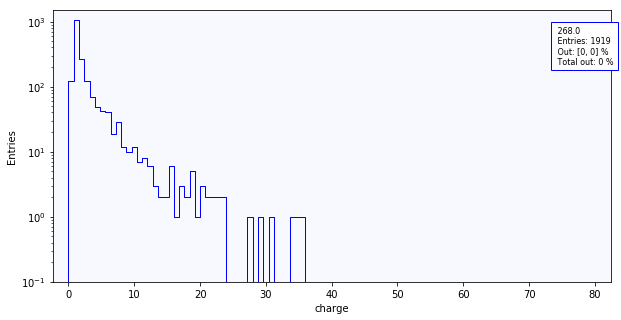

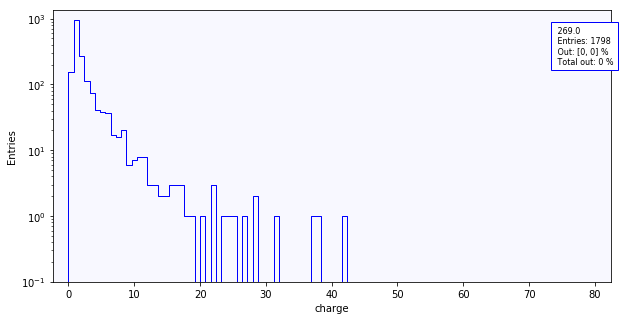

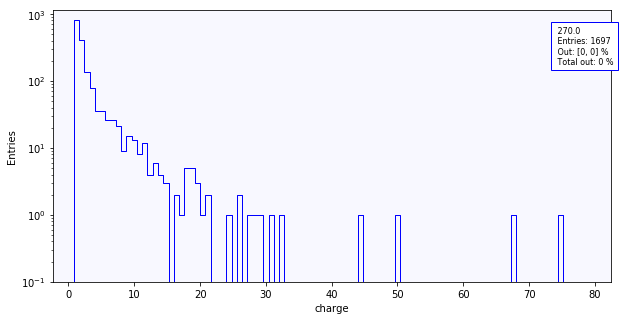

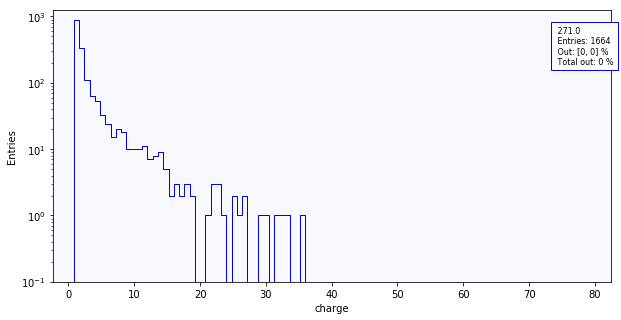

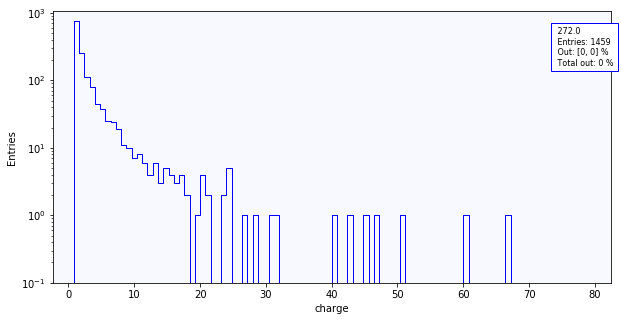

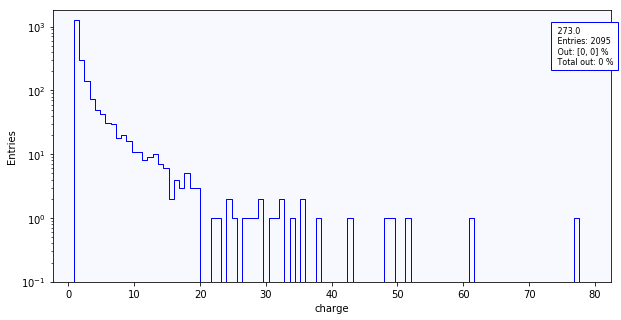

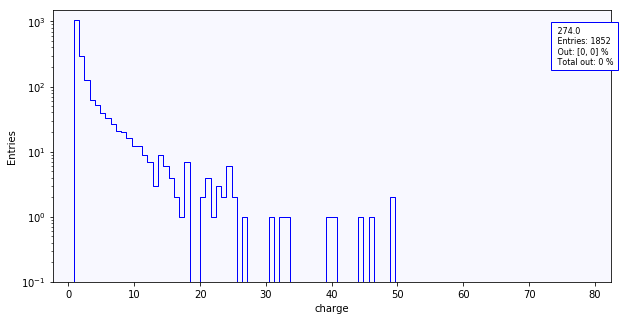

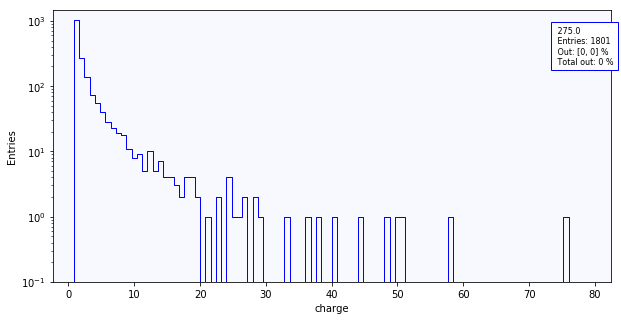

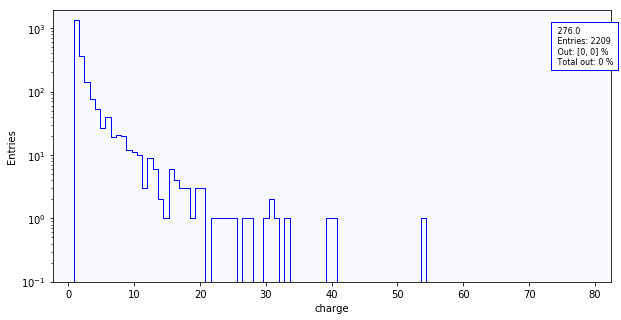

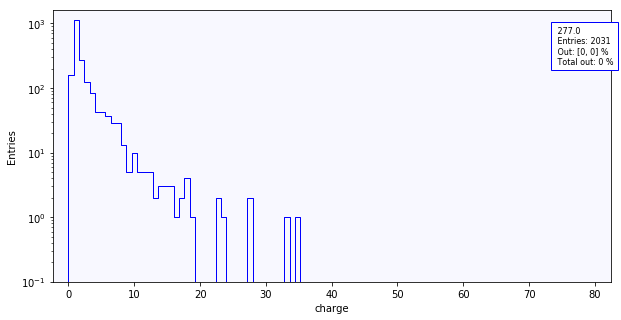

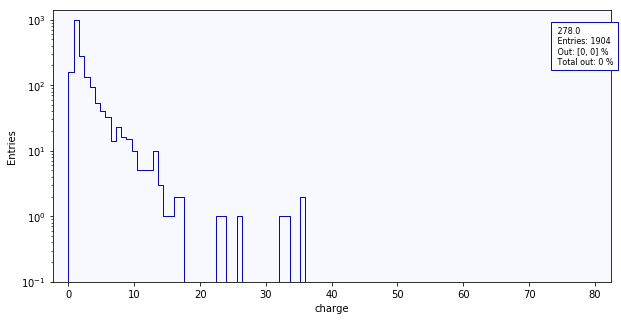

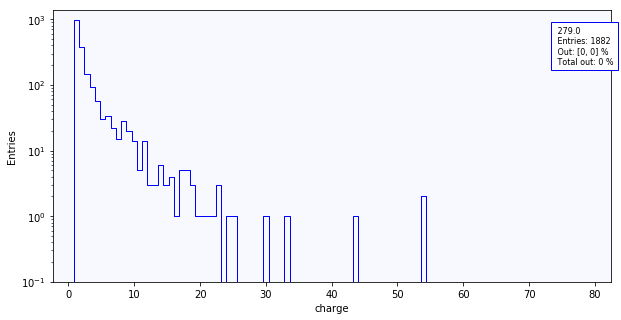

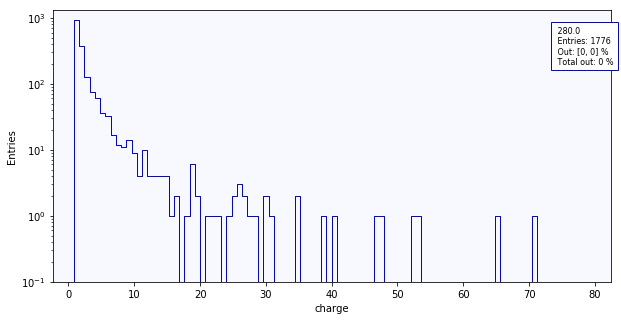

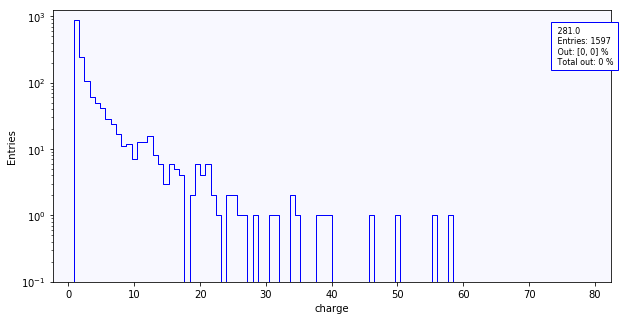

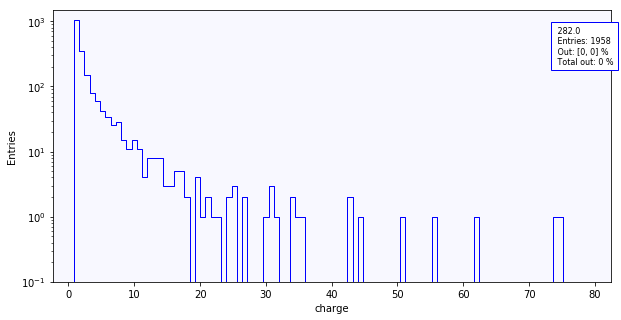

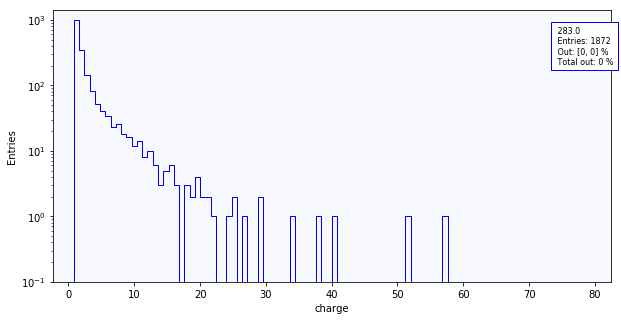

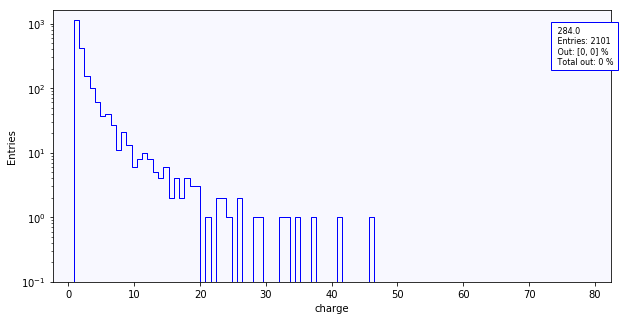

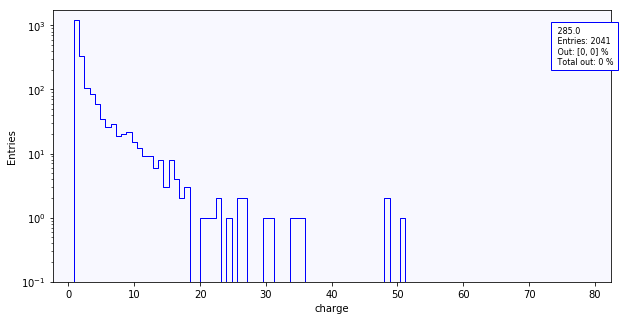

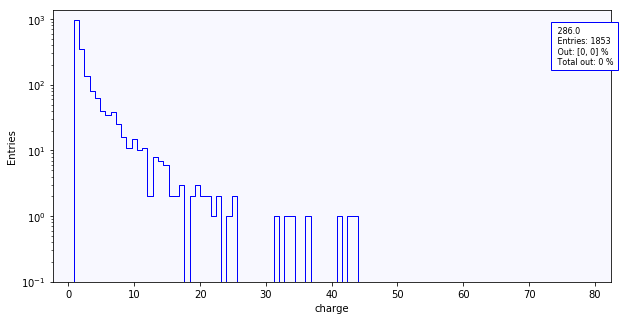

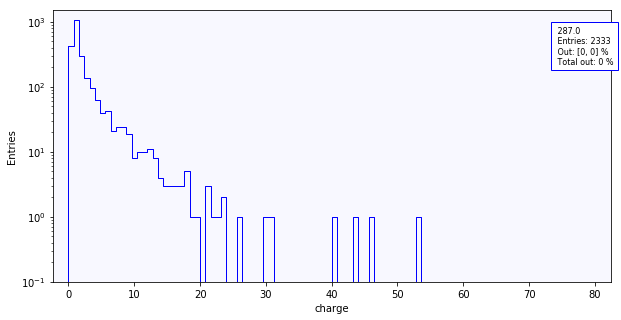

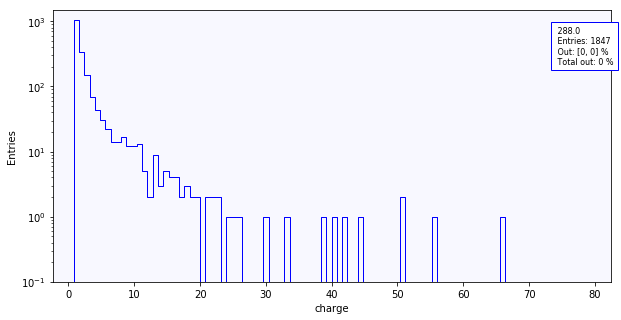

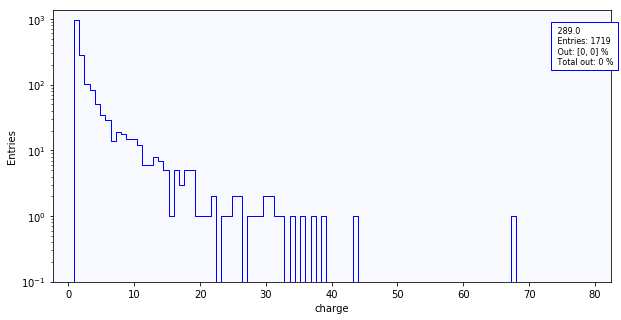

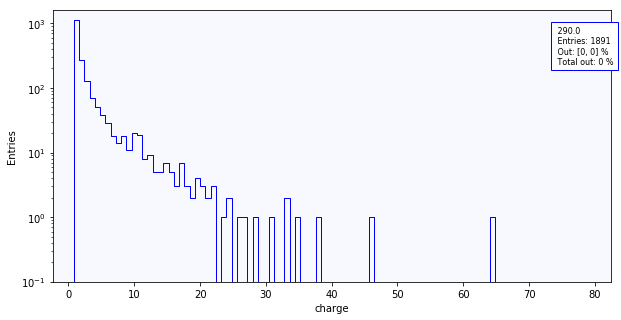

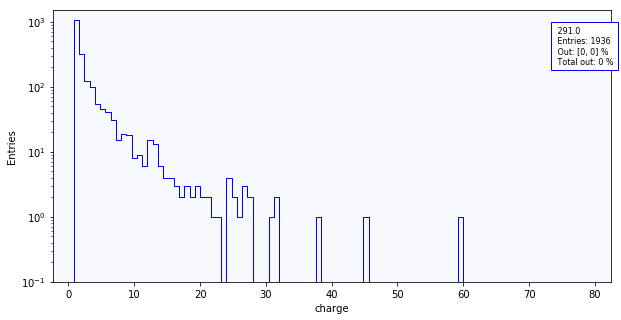

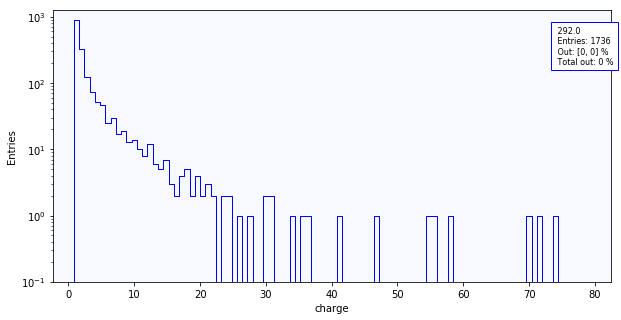

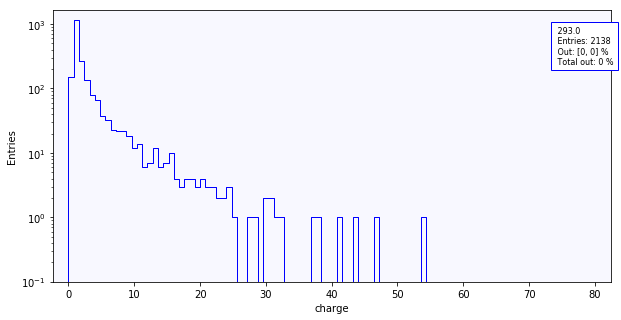

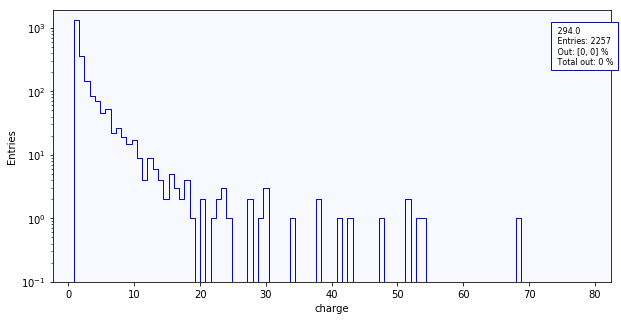

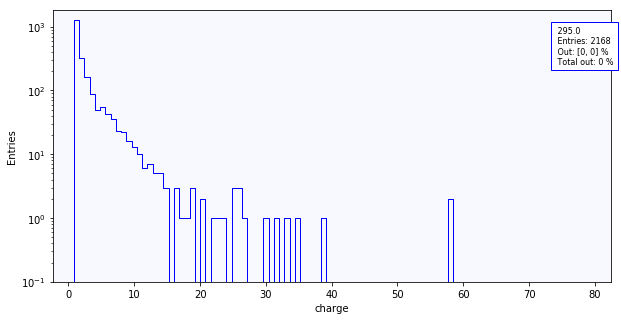

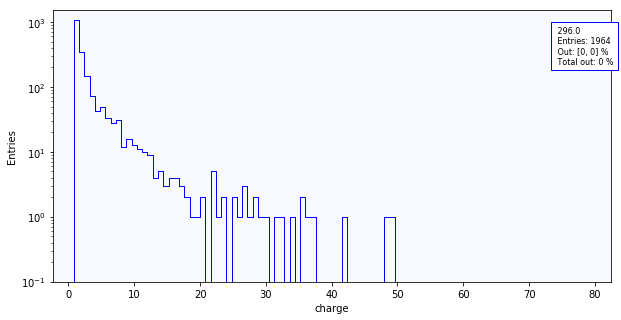

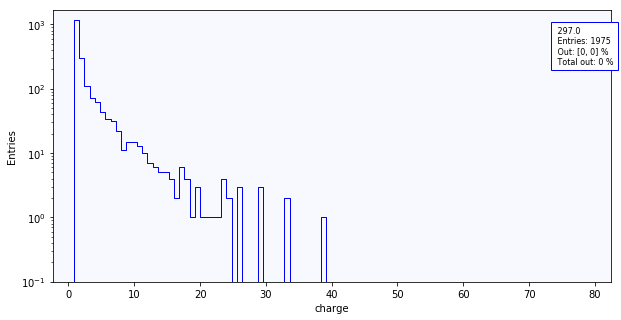

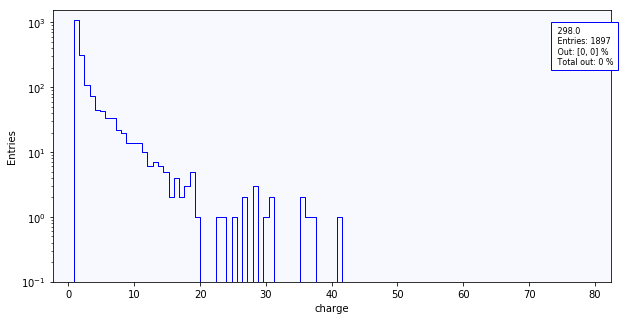

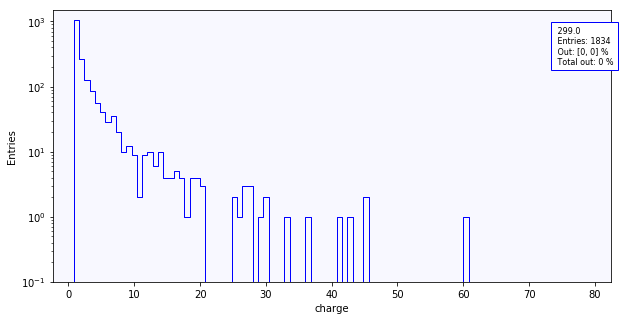

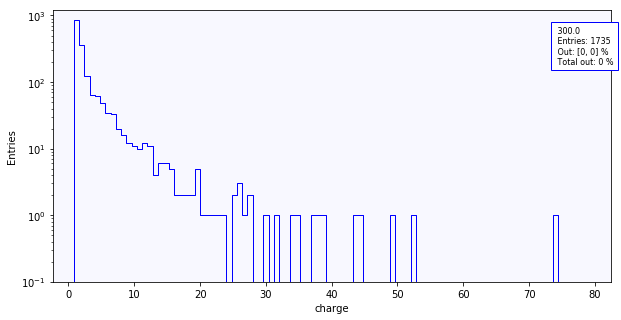

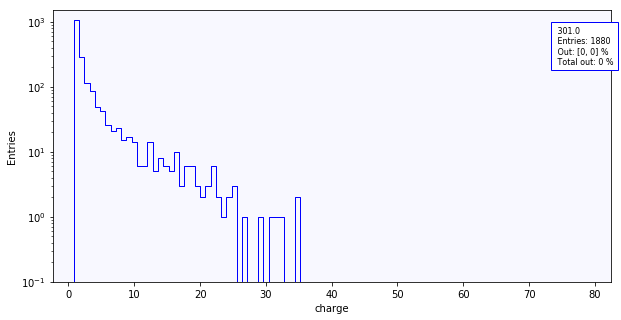

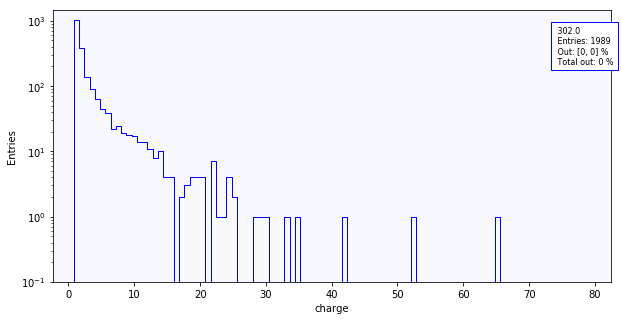

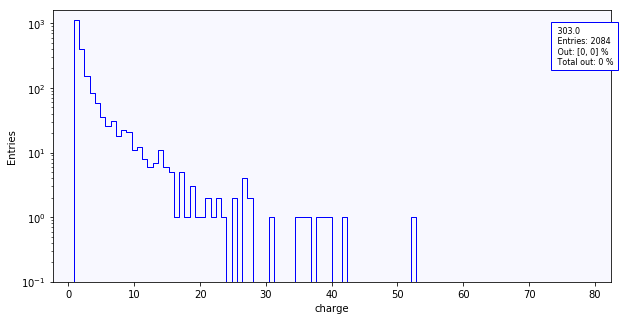

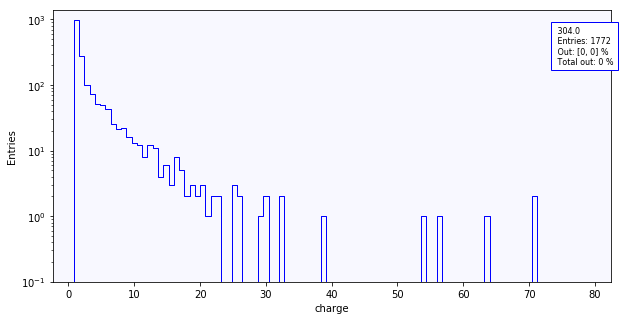

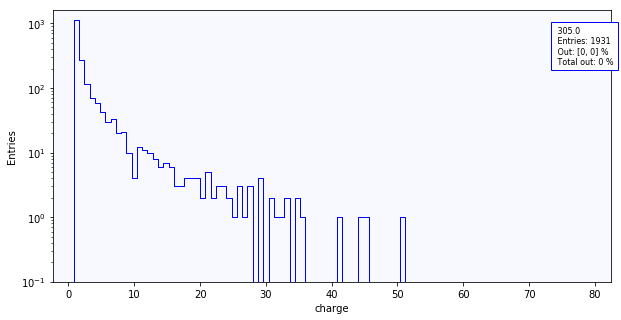

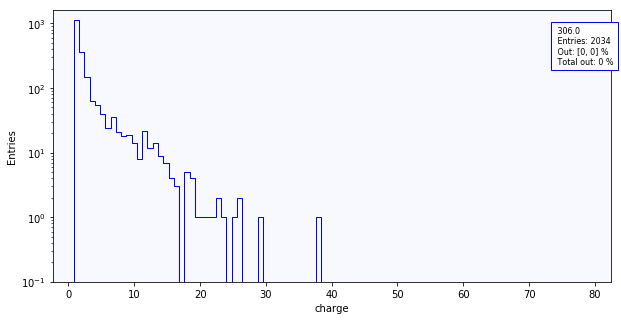

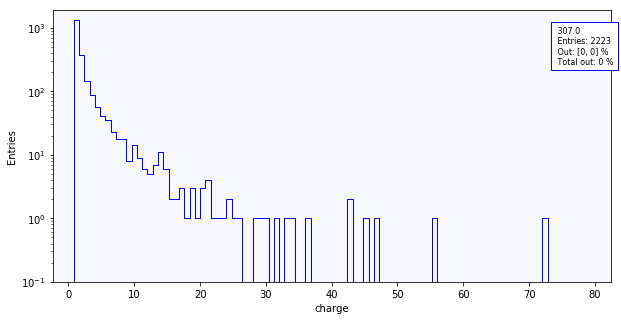

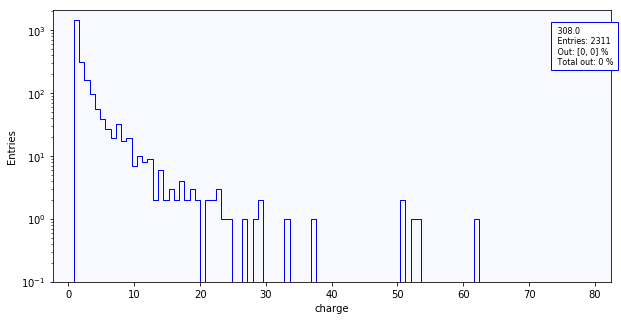

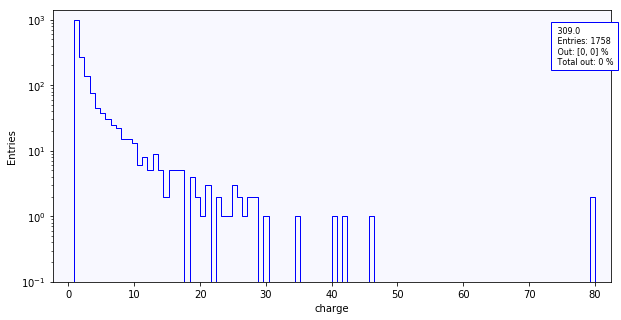

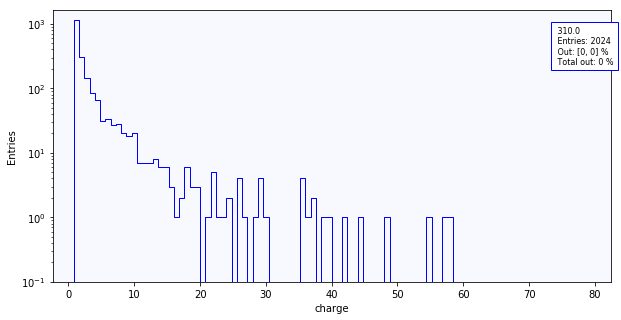

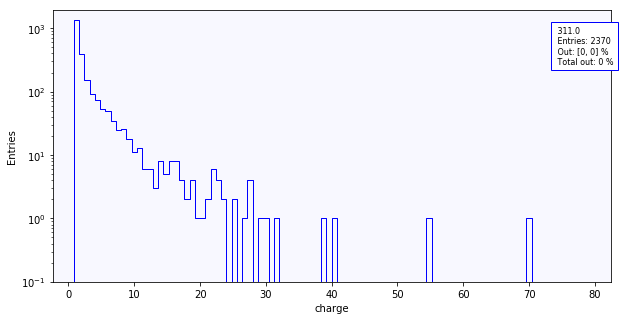

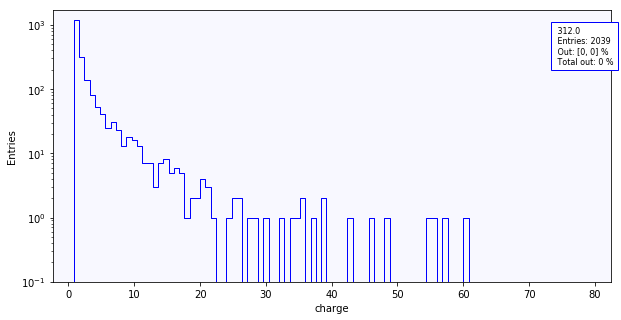

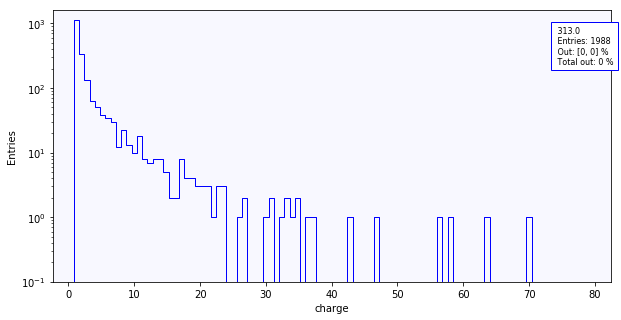

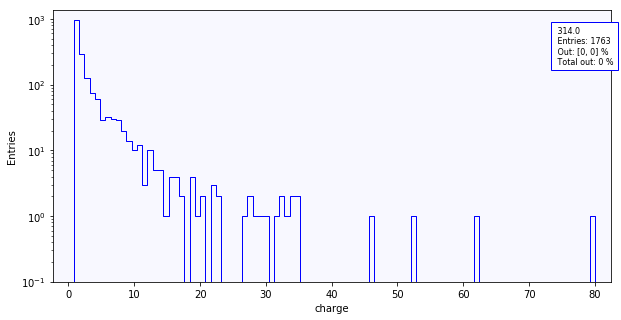

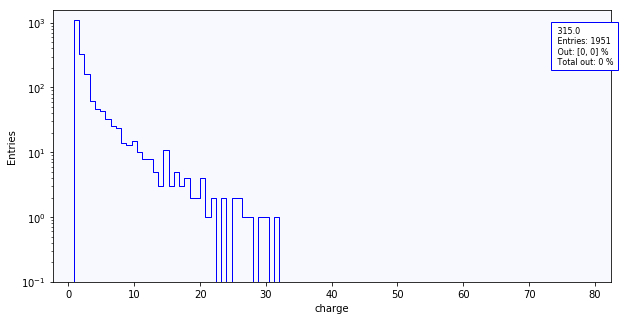

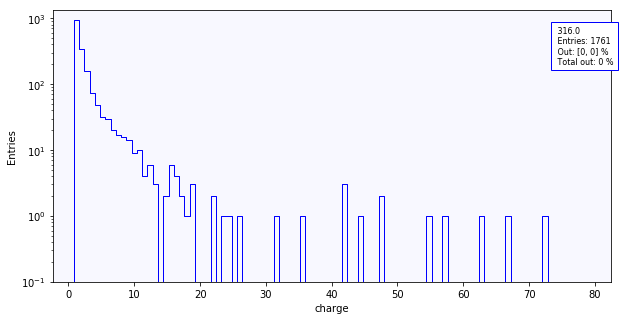

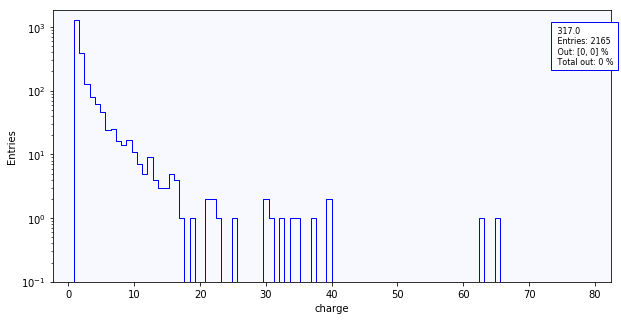

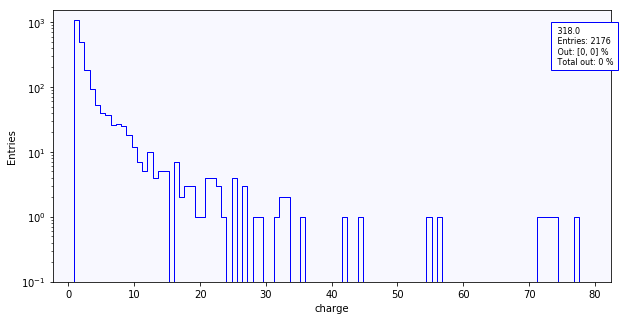

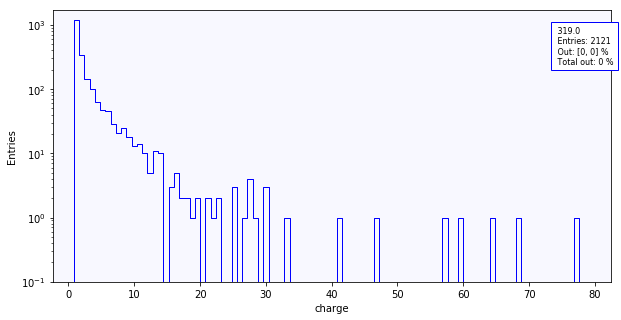

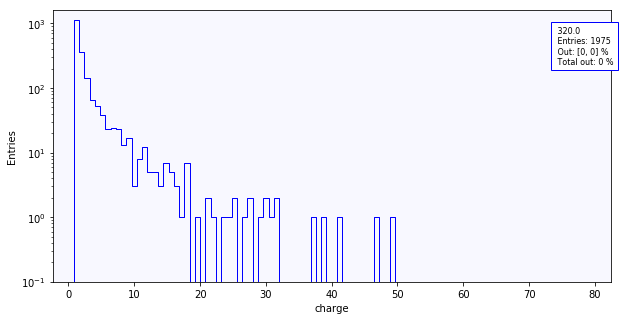

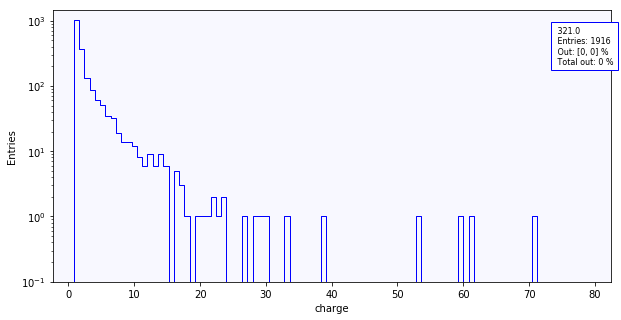

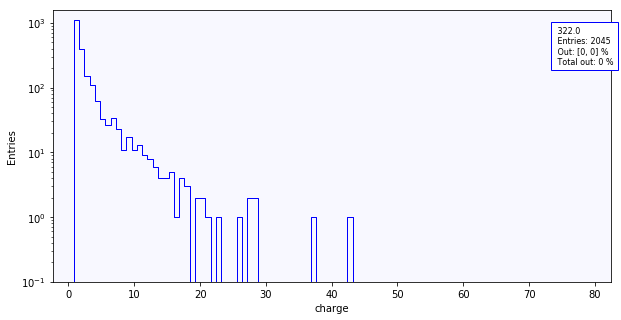

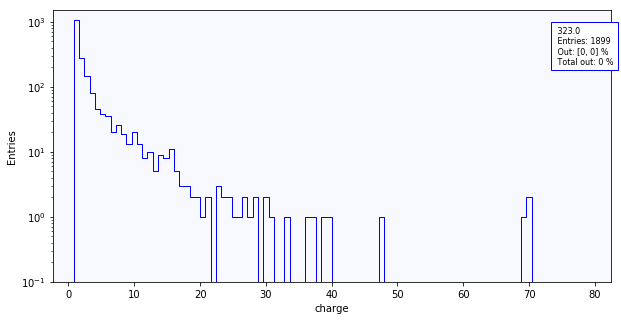

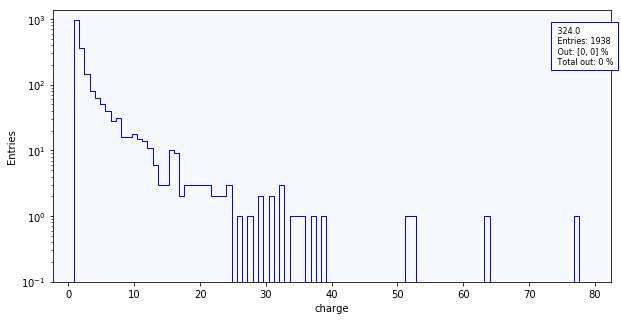

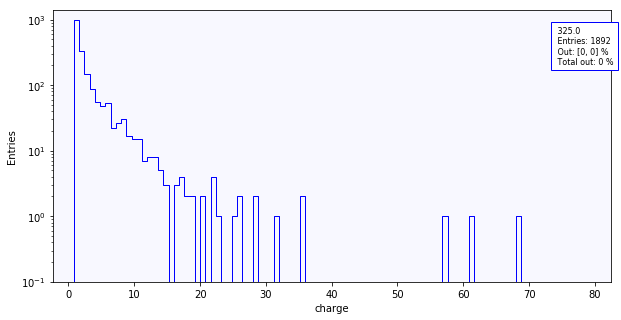

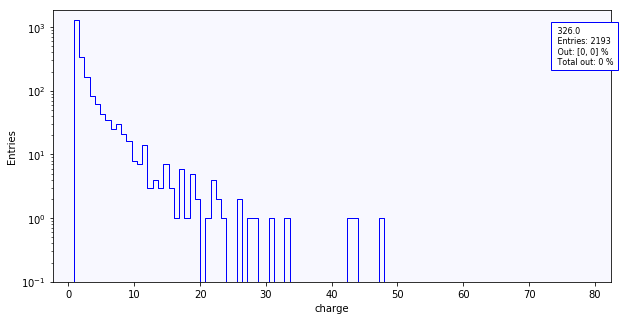

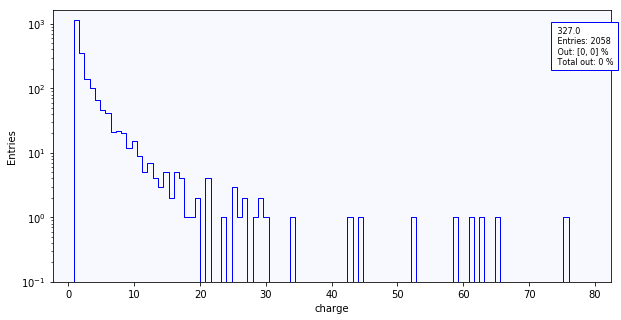

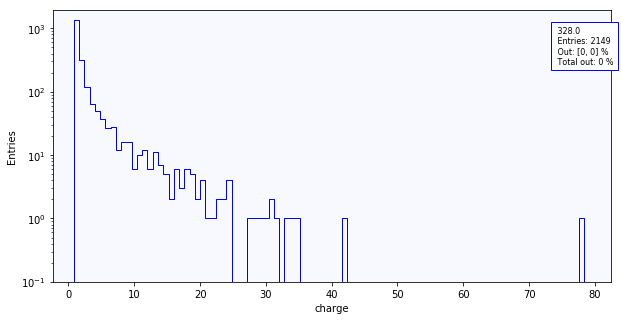

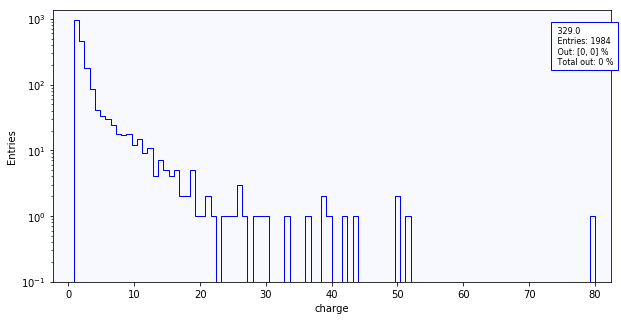

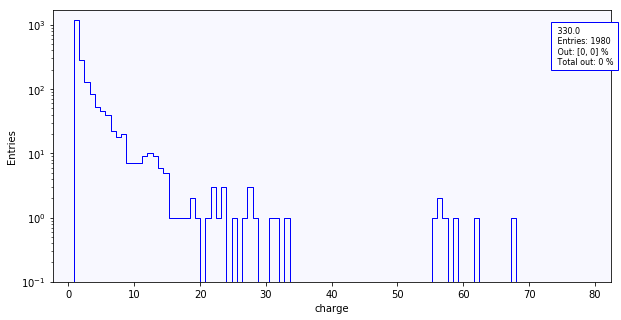

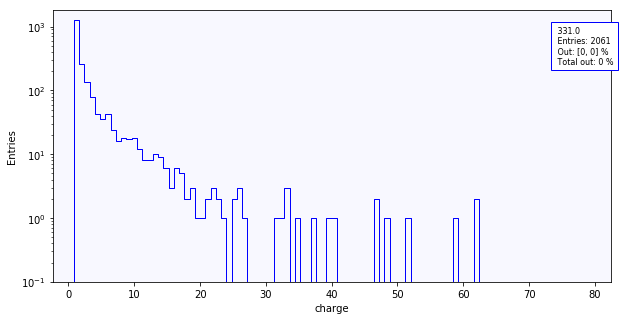

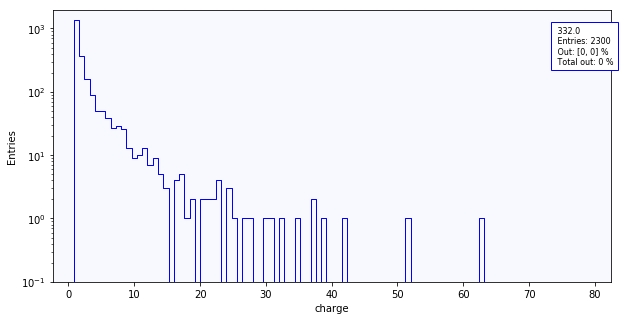

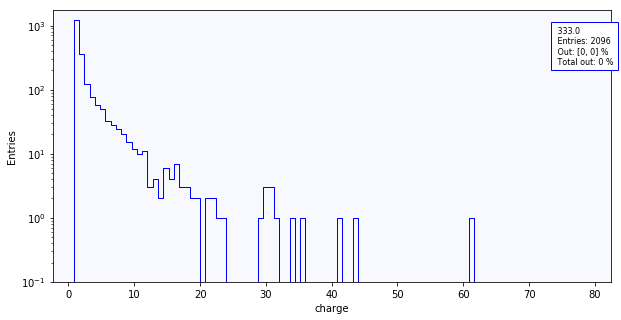

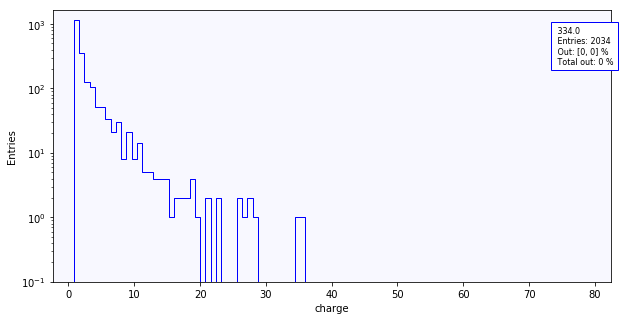

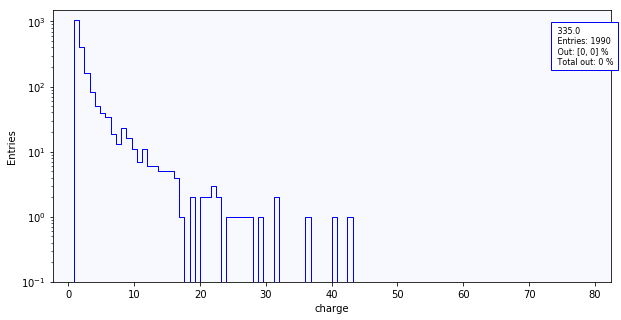

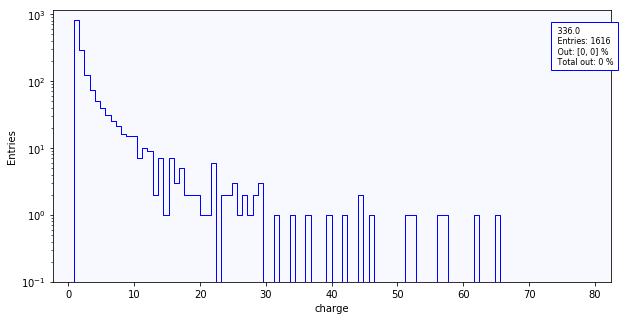

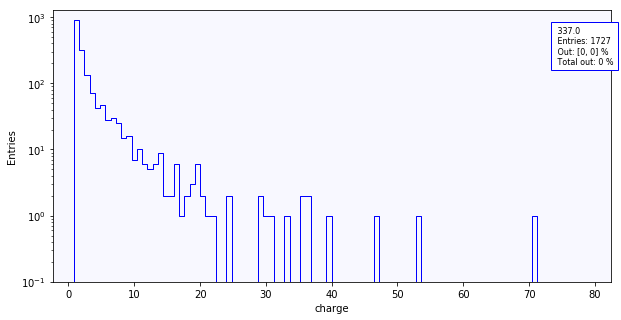

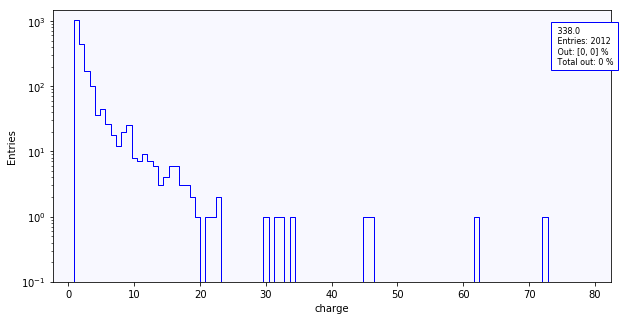

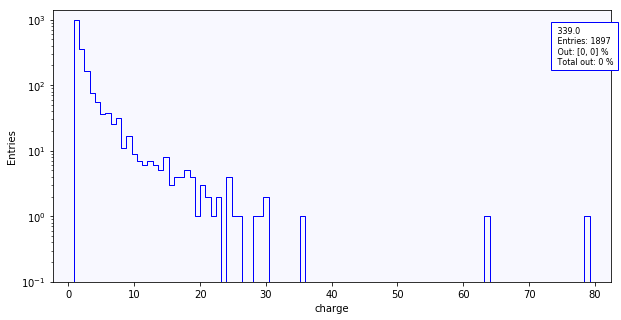

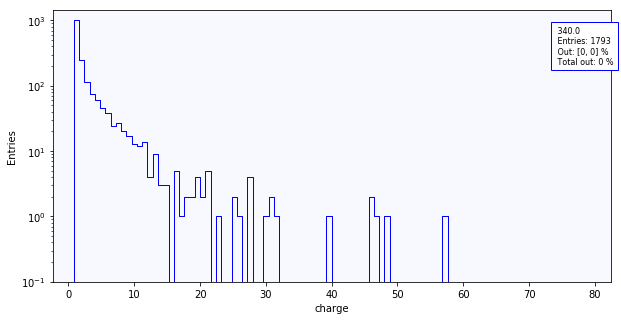

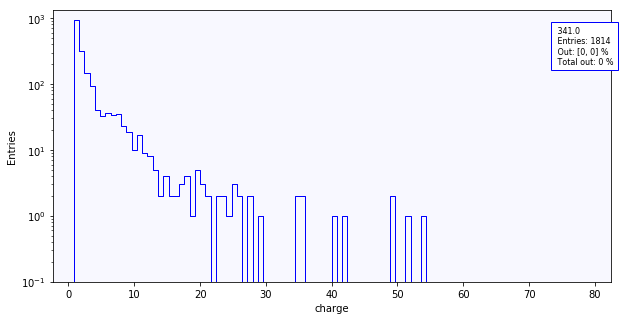

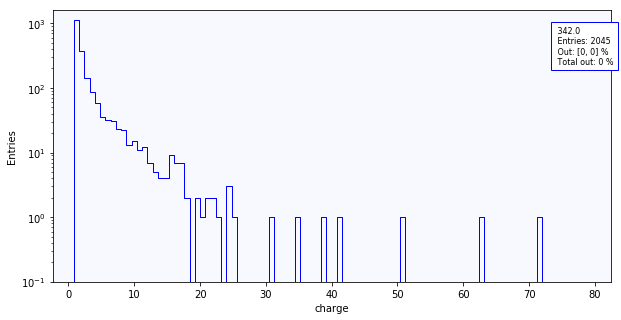

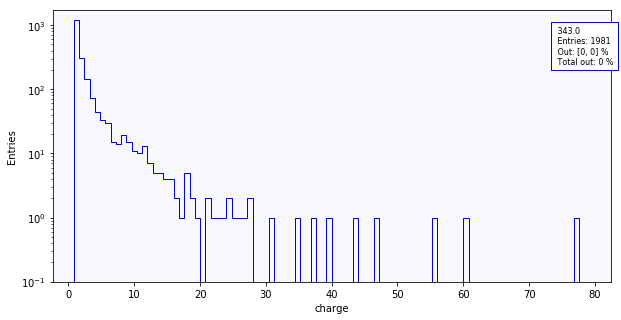

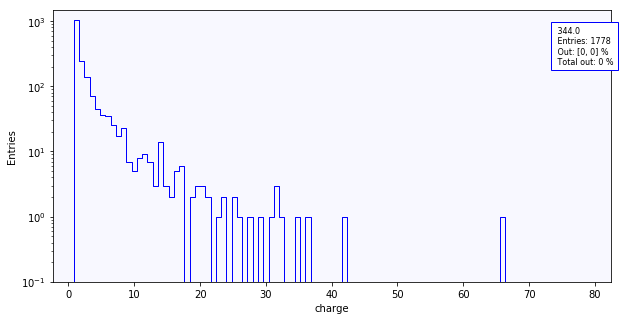

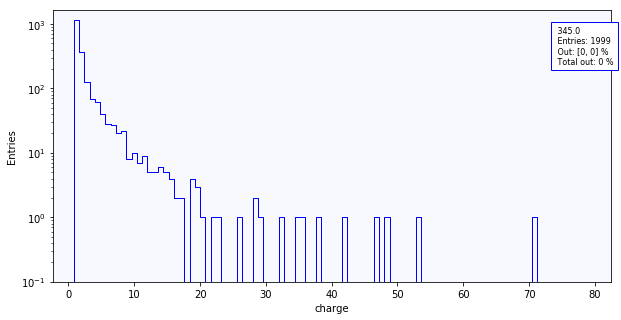

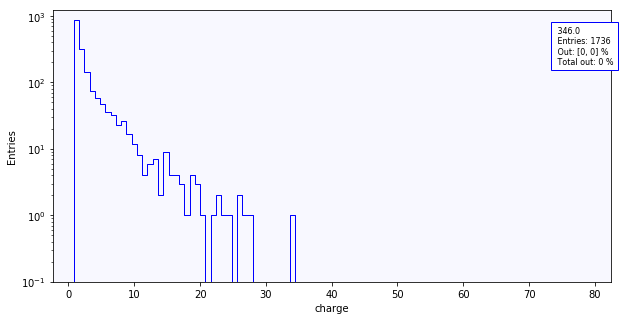

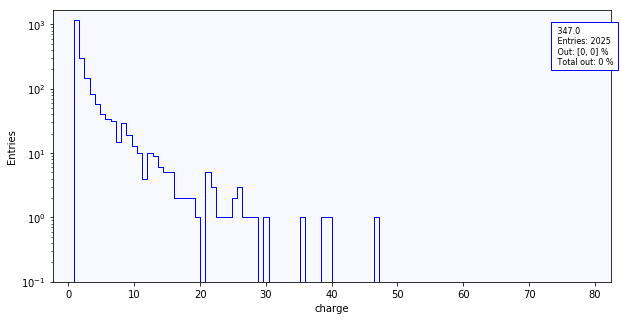

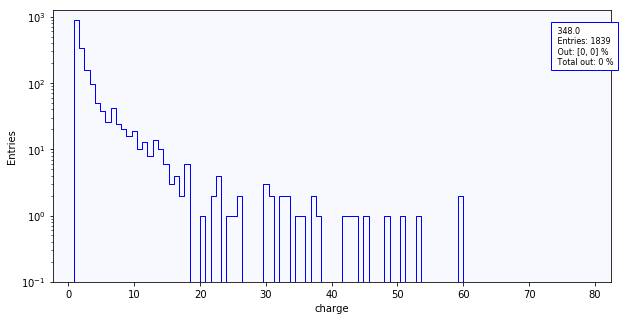

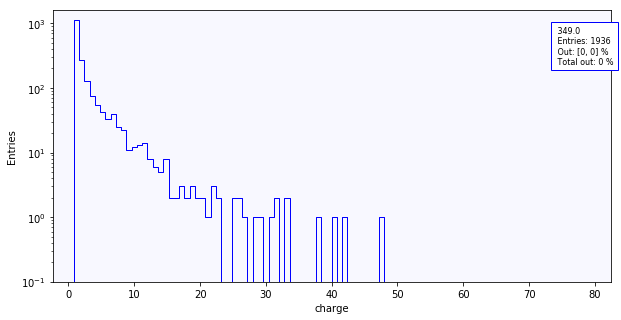

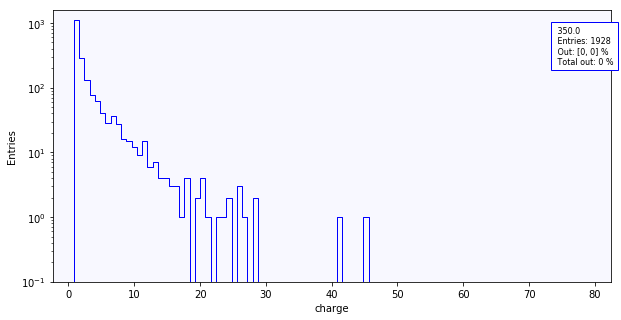

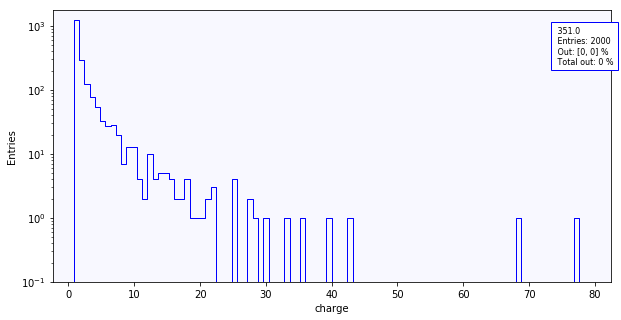

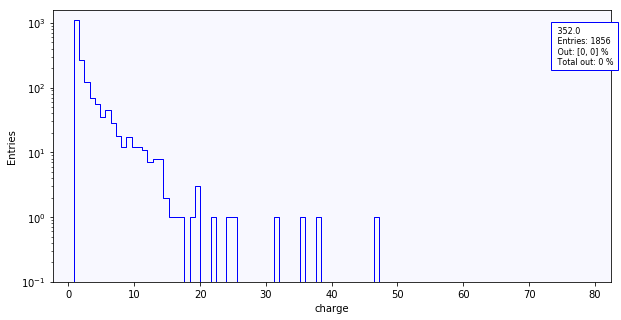

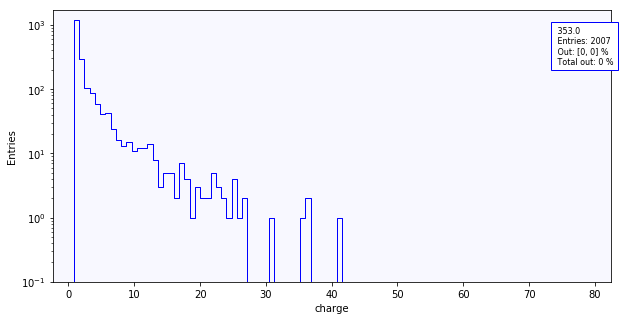

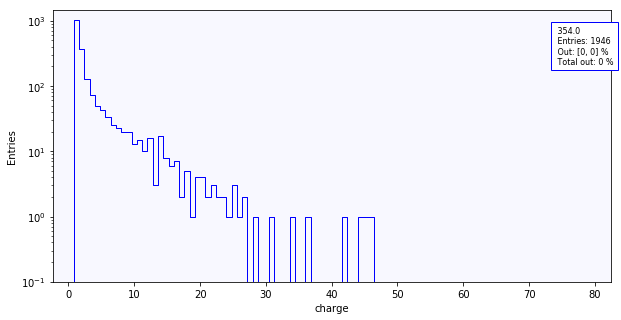

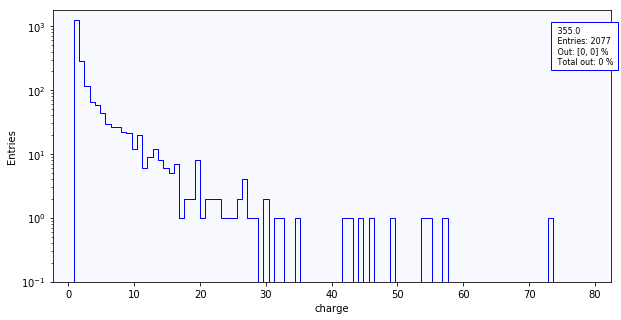

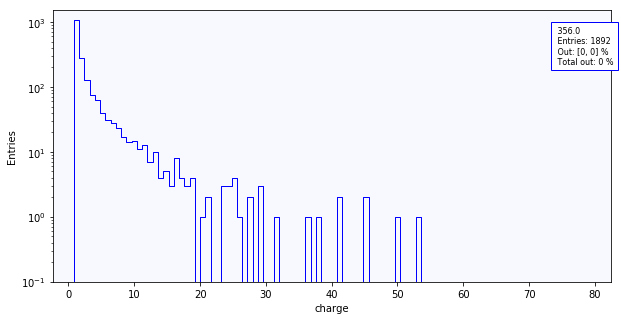

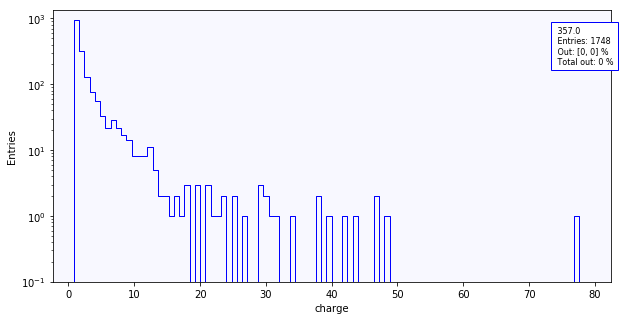

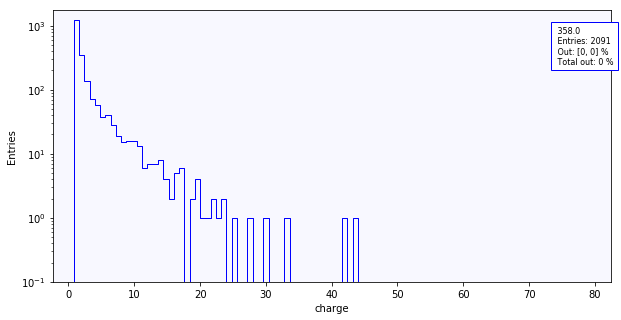

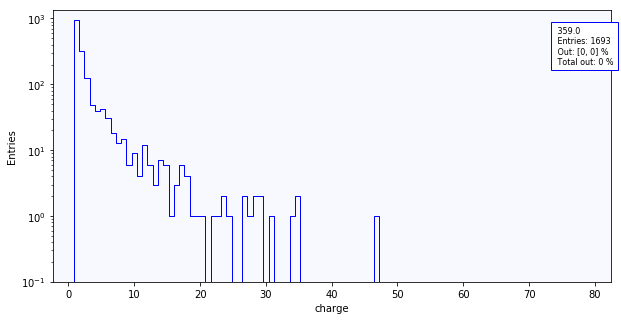

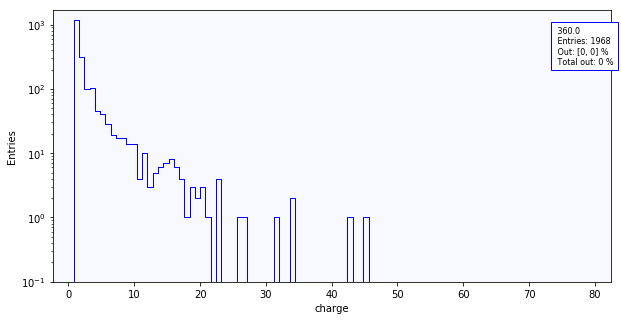

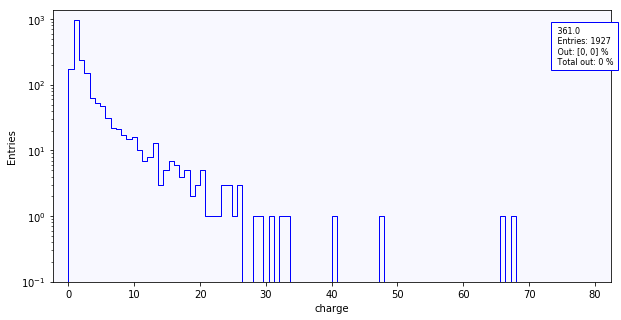

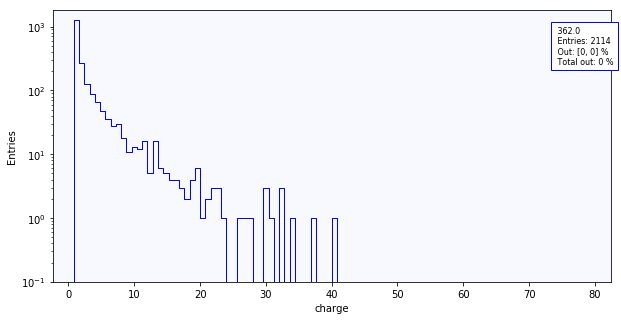

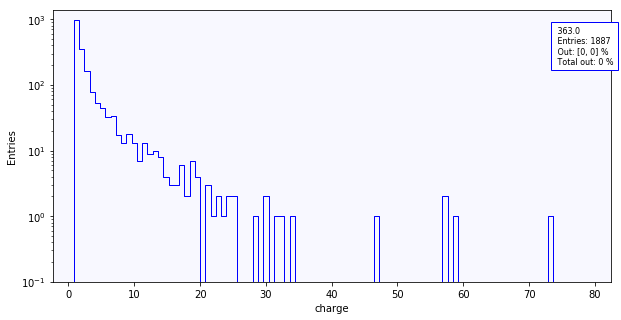

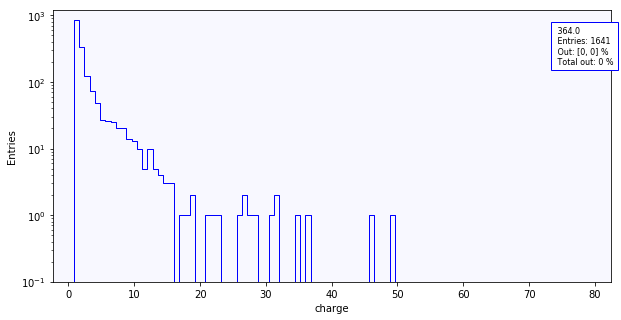

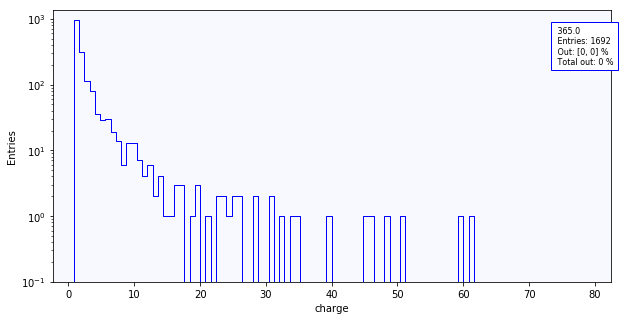

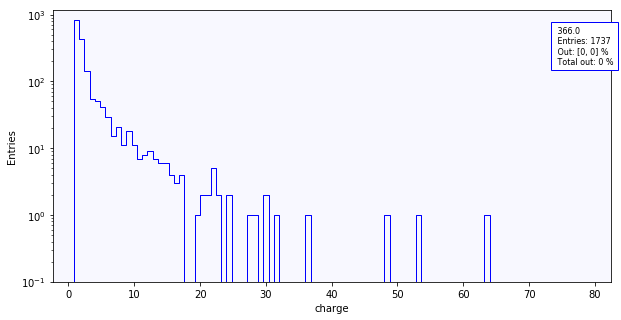

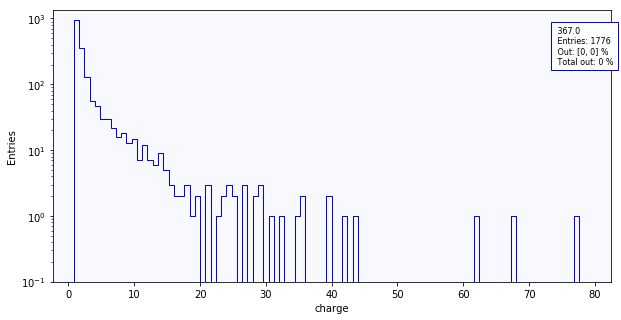

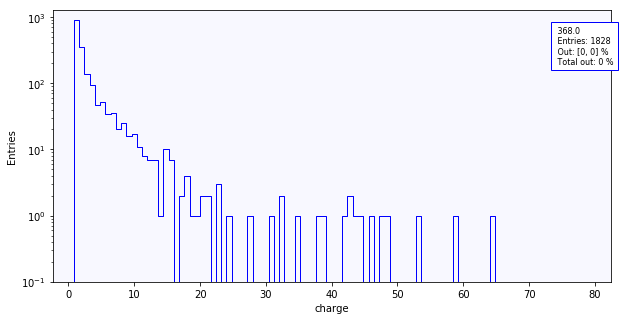

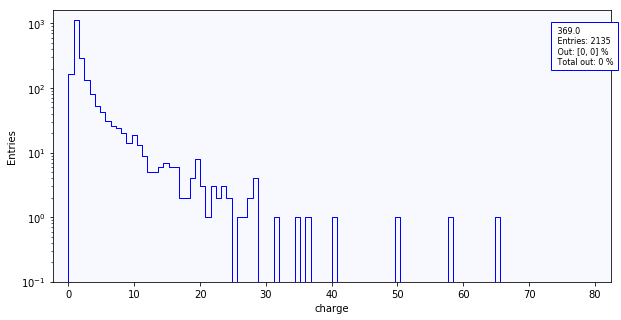

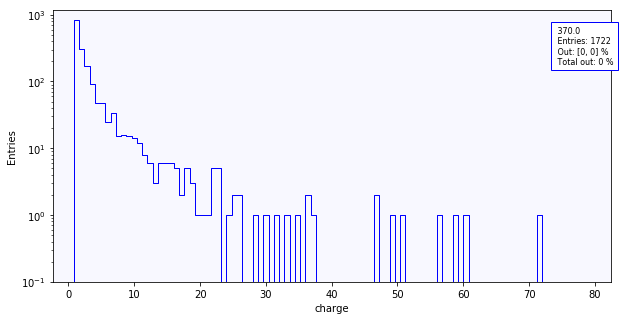

In [ ]:
sipms = np.unique(sipm_charge[:, 0])

cut=1e3
for sipm in sipms:
    sel = sipm_charge[:, 0]==sipm
    data = sipm_charge[sel][:, 1]
    
    if len(data)>=cut:
        histo1D(data,
                bins=100,
                xlabel="charge",
                xlims=[0, 80],
                Label0=f"{sipm}",
                scale="log")